In [1]:
'''Python Notebook for MIR Group Project'''
'''Jamila, Henry, and Paul'''

'Jamila, Henry, and Paul'

In [1]:
import IPython.display as ipd
import librosa, os, pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft

def plot_sound(labeldict, filedir, filename, dur, plttitle):
    audio, srate = librosa.load(filedir+filename, duration=dur)
    plt.plot(np.abs(audio))
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    plt.title(plttitle+' '+filename[:len(filename)-4]+' Absolute Samples vs. Amplitude Plot')
    plt.show()
    return ipd.Audio(audio, rate=srate)
def rms_track(data, hopSize, winSize):
    offsets = np.arange(0, len(data), hopSize)
    rms_track = np.zeros(len(offsets))
    
    for (m,o) in enumerate(offsets): 
        frame = data[o:o+winSize] 
        rms_track[m] = np.sqrt(np.mean(np.square(frame)))  
    return (rms_track)
def get_audio_thresh(filedir, filename, percent, hopsz=2048, winsz=2048):
    audio, sr = librosa.load(filedir+filename)
    pt = rms_track(audio, hopsz, winsz)
    max_peak = max(pt)
    thresh = max_peak * percent
    peaks = np.where(pt<thresh, 0, pt)
    peaks = peaks[:256]
    acr = np.correlate(peaks, peaks, mode='full')
    acr = acr[int(len(acr)/2):]
    acr_peak_location = np.argmax(acr[1:])+1
    # calculate bpm
    indices = np.nonzero(peaks)[0]
    period_in_frames = np.median(np.diff(indices))
    period_in_samples = period_in_frames * hopsz
    period_in_secs = period_in_samples / sr
    bpm = 60.0 / period_in_secs
    print("%2.2f BPM" %  (bpm))

labels = {} # [ whistled, hooting, clicking, burry or buzzy, nasal, noisy, polyphonic ] 
path = './wav/'

In [ ]:
# must load birddict before the next cells

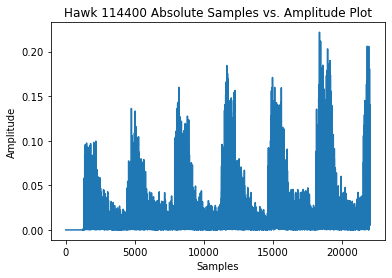

In [7]:
birdtype = None
for k,v in birddict.items():
    if '114400' in v: birdtype = k
plot_sound(labels, path, '114400.wav', 1, birdtype) # 115656

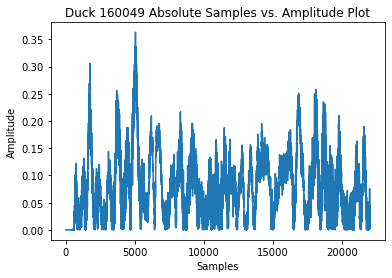

In [8]:
birdtype = None
for k,v in birddict.items():
    if '160049' in v: birdtype = k
plot_sound(labels, path, '160049.wav', 1, birdtype)

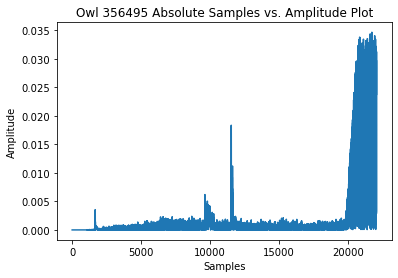

In [9]:
birdtype = None
for k,v in birddict.items():
    if '356495' in v: birdtype = k
plot_sound(labels, path, '356495.wav', 1, birdtype)

In [ ]:
birddict

Highest Peak Frequency 946.0


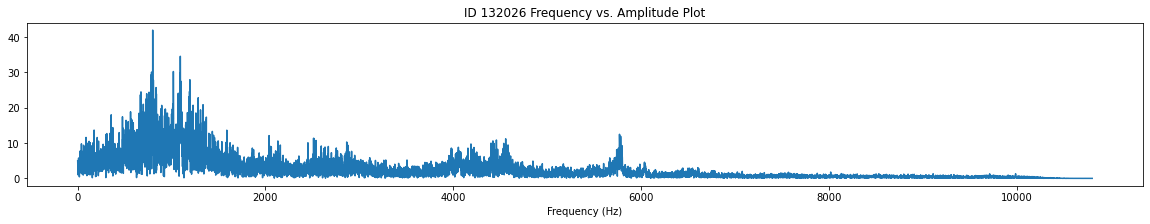

In [124]:
def get_peakfreq(audio, sr, prcnt, lowerbound):
    signalmax = max(abs(fft(audio)[sr//lowerbound:sr//2]))
    l = []
    for i, s in enumerate(abs(fft(audio)[sr//lowerbound:sr//2])): # There may be a high amp signal near 0 so introduce a buffer.
        if s > signalmax * prcnt: l.append((i,s))
    freqsum = 0
    for t in l:
        freqsum += t[0]
    if len(l) == 0: return -1
    return freqsum/len(l)
def get_peakfreq_dict(iddict, lowerbound, filedir, filename, percent):
    audio, sr = librosa.load(filedir+filename) # <fname>.wav
    plt.plot(abs(fft(audio[0*sr:sr*1])[sr//lbound:sr//2]))
    freq = get_peakfreq(audio[0*sr:sr*1], sr, percent, lowerbound)
    iddict[filename[:len(filename)-4]] = [freq]
    print('Highest Peak Frequency', freq)
    plt.xlabel('Frequency (Hz)')
    plt.title('ID '+filename[:len(filename)-4]+' Frequency vs. Amplitude Plot')
    plt.show()
    return iddict
iddict = {}
lbound = 100
iddict = get_peakfreq_dict(iddict, lbound, path, '132026.wav', 0.8)

Highest Peak Frequency 1593.2


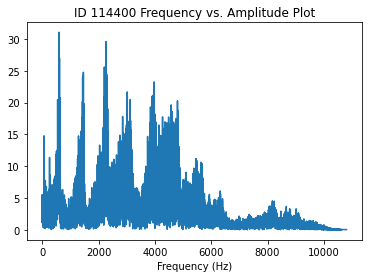

In [49]:
iddict = get_peakfreq_dict(iddict, lbound, path, '114400.wav', 0.8)

Highest Peak Frequency 644.5


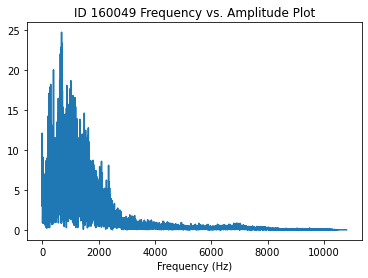

In [48]:
iddict = get_peakfreq_dict(iddict, lbound, path, '160049.wav', 0.8)

Highest Peak Frequency 864.0


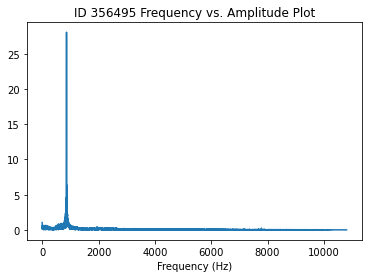

In [47]:
iddict = get_peakfreq_dict(iddict, lbound, path, '356495.wav', 0.8)

In [117]:
iddict = {}
for itr,f in enumerate(os.listdir('./wav')):
    print(itr)
    iddict = get_peakfreq_dict(iddict, lbound, path, f, 0.8)

my_pickled_object = pickle.dumps(iddict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [125]:
def plot_audio_thresh(percent, filedir, filename):
    audio, sr = librosa.load(filedir+filename, duration=1)
    hopSize = winSize = 2048
    if len(audio) // sr >= 5: pt = rms_track(audio[:5*sr], hopSize, winSize)
    else: pt = rms_track(audio[:1*sr], hopSize, winSize)

    max_peak = max(pt)
    thresh = max_peak * percent
    
    my_condition = pt<thresh # and not already_over_thresh
    peaks = np.where(my_condition, 0, pt) 
    
    plt.figure(figsize=(5,3))
    plt.plot(pt)
    indices = np.nonzero(peaks)[0]
    for indx in indices:
        plt.axvline(color='red', linewidth=1, x=indx)
        
    plt.title('ID '+filename[:len(filename)-4]+' Peak-picked RMS Contour')
    return indices
def get_peak_indices(percent, filedir, filename):
    audio, sr = librosa.load(filedir+filename, duration=1)
    hopSize = winSize = 2048
    pt = rms_track(audio, hopSize, winSize)
    max_peak = max(pt)
    thresh = max_peak * percent
    peaks = np.where(pt<thresh, 0, pt) 
    indices = np.nonzero(peaks)[0]
    return indices
def get_num_peaks(peaklist):
    return len(peaklist)
def get_interpeak_distance(peaklist):
    interdistancelist = []
    for i,pk in enumerate(peaklist):
        if i == len(peaklist)-1: break
        interdistancelist.append(peaklist[i+1]-pk)
    return interdistancelist

peaklist = get_peak_indices(0.8, path, '114400.wav') # chirps 114400
print(get_num_peaks(peaklist))
print(get_interpeak_distance(peaklist))


3
[2, 1]


array([ 7,  9, 10])

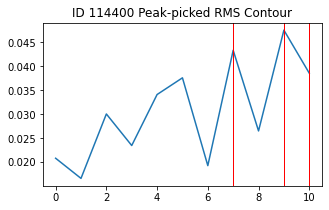

In [65]:
plot_audio_thresh(0.8, path, '114400.wav')

array([2, 8])

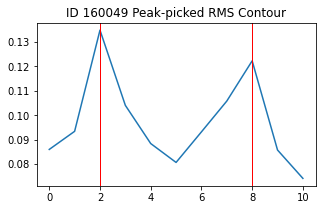

In [66]:
plot_audio_thresh(0.8, path, '160049.wav')

array([10])

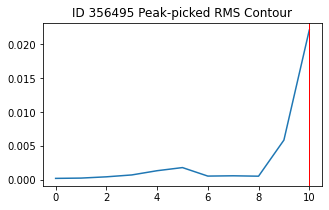

In [67]:
plot_audio_thresh(0.8, path, '356495.wav')

In [2]:
iddict_ = {'65815': [20.0],
 '65866': [16.0],
 '66176': [533.7],
 '65871': [3761.6666666666665],
 '73493': [789.0],
 '65874': [17.5],
 '65924': [186.625],
 '65930': [42.0],
 '65926': [17.0],
 '65939': [212.0],
 '65941': [316.0],
 '65983': [212.0],
 '66013': [371.5],
 '65990': [5557.0],
 '66033': [47.0],
 '66035': [4704.444444444444],
 '121453': [3058.285714285714],
 '66037': [7432.380952380952],
 '66038': [6017.0],
 '158964': [927.5],
 '157678': [347.25],
 '66099': [2861.0],
 '66091': [66.75],
 '66103': [4875.4],
 '66174': [7136.129032258064],
 '66239': [766.9285714285714],
 '157580': [3347.5],
 '66177': [3139.0],
 '66240': [487.7],
 '66241': [7280.625],
 '90407': [2179.3333333333335],
 '67086': [4816.714285714285],
 '116589': [605.375],
 '73494': [13.333333333333334],
 '73495': [48.5],
 '73496': [108.5],
 '116590': [742.0625],
 '73497': [2947.285714285714],
 '159120': [858.3333333333334],
 '73498': [5233.153846153846],
 '73499': [3514.7272727272725],
 '73500': [237.0],
 '158974': [2952.5714285714284],
 '73501': [26.0],
 '73502': [715.0],
 '73503': [181.57142857142858],
 '73504': [2409.1],
 '74418': [67.0],
 '157430': [1873.5],
 '76628': [404.22222222222223],
 '79658': [923.0],
 '79657': [3383.0],
 '76632': [19.0],
 '156739': [313.1666666666667],
 '82848': [125.0],
 '82849': [5098.384615384615],
 '82850': [535.0],
 '97639': [602.8],
 '115656': [806.5],
 '121094': [104.5],
 '122640': [7557.5],
 '123580': [3261.875],
 '127371': [385.0],
 '132026': [946.0],
 '137625': [5215.538461538462],
 '141872': [804.0],
 '141873': [7742.5],
 '141875': [2365.2580645161293],
 '141876': [7228.5161290322585],
 '141877': [53.0],
 '142824': [150.71428571428572],
 '142827': [25.0],
 '142828': [20.0],
 '156522': [4231.428571428572],
 '156521': [3756.0],
 '156217': [3608.5],
 '156524': [19.0],
 '156527': [1199.2],
 '156526': [1321.375],
 '156533': [1303.0],
 '156528': [5227.444444444444],
 '156525': [5606.666666666667],
 '158985': [165.33333333333334],
 '156530': [1314.75],
 '156535': [952.5],
 '156529': [2649.090909090909],
 '156729': [279.5],
 '156741': [6074.0],
 '156767': [764.0],
 '156770': [123.5],
 '156775': [67.0],
 '156776': [3384.032258064516],
 '156778': [128.375],
 '156727': [37.5],
 '156785': [733.5],
 '157431': [3.0],
 '156738': [3261.5],
 '156777': [850.0],
 '156798': [6780.444444444444],
 '157432': [182.66666666666666],
 '157579': [4052.75],
 '157581': [1213.0],
 '157577': [2945.0],
 '156740': [913.0],
 '157583': [3055.5],
 '157585': [527.5],
 '157587': [107.0],
 '157588': [4020.6666666666665],
 '157591': [3173.5],
 '157595': [4601.875],
 '157598': [1340.4285714285713],
 '157604': [7196.617021276596],
 '157608': [212.5],
 '157619': [4837.272727272727],
 '157640': [2575.9444444444443],
 '157679': [5194.272727272727],
 '157680': [76.66666666666667],
 '157681': [4187.318181818182],
 '157682': [4651.4],
 '159182': [324.0],
 '158416': [8576.111111111111],
 '157683': [729.1538461538462],
 '158535': [1897.923076923077],
 '158912': [195.0],
 '158913': [68.0],
 '158914': [6676.5],
 '158917': [3931.9193548387098],
 '158918': [474.1],
 '158957': [835.8333333333334],
 '159532': [129.5],
 '158958': [6932.0],
 '158959': [824.4545454545455],
 '158960': [6631.896551724138],
 '158961': [2337.4285714285716],
 '158962': [734.1666666666666],
 '158963': [34.0],
 '158965': [64.0],
 '158966': [15.0],
 '158967': [6208.2],
 '158969': [8318.5],
 '158971': [3641.3333333333335],
 '158972': [5710.0],
 '158973': [1072.0],
 '158975': [744.7],
 '158976': [29.5],
 '158978': [2943.0],
 '158979': [7077.5],
 '158980': [3168.0],
 '158981': [3545.25],
 '159396': [701.5],
 '158982': [4936.2307692307695],
 '158983': [4489.785714285715],
 '159454': [606.1428571428571],
 '159391': [213.0],
 '159135': [3058.0],
 '159387': [110.83333333333333],
 '159523': [6559.369565217391],
 '159497': [201.35714285714286],
 '158987': [6558.409090909091],
 '159119': [593.7272727272727],
 '159456': [1839.0],
 '159121': [864.8947368421053],
 '159122': [984.0],
 '159123': [858.1111111111111],
 '159441': [592.1111111111111],
 '159124': [718.3333333333334],
 '159125': [4334.0],
 '159499': [6653.625],
 '159529': [6984.8490566037735],
 '159377': [1319.0],
 '159266': [1612.0],
 '159126': [4902.03125],
 '159436': [1883.4375],
 '159127': [4234.857142857143],
 '159128': [4084.0],
 '159548': [3873.542857142857],
 '159129': [3507.5925925925926],
 '159130': [7371.2444444444445],
 '159527': [102.5],
 '159271': [3.0],
 '159131': [171.4],
 '159132': [25.4],
 '159368': [2303.866666666667],
 '159133': [2990.6428571428573],
 '159775': [3884.839285714286],
 '159259': [6043.0],
 '159134': [5372.058823529412],
 '159136': [23.0],
 '159137': [154.5],
 '159138': [4725.5],
 '159139': [5996.066666666667],
 '159140': [3572.777777777778],
 '159389': [5698.2307692307695],
 '159141': [36.25],
 '159546': [162.0],
 '159501': [100.0],
 '159145': [213.0],
 '159520': [584.2],
 '159147': [213.0],
 '159148': [213.0],
 '159150': [1304.6],
 '159547': [172.0],
 '159545': [213.0],
 '159151': [557.5],
 '159533': [3560.6],
 '159177': [7163.5],
 '159178': [3940.1111111111113],
 '159179': [655.2],
 '159275': [53.5],
 '159540': [1564.0],
 '159183': [432.0],
 '159184': [182.66666666666666],
 '159552': [2977.6153846153848],
 '160242': [98.5],
 '159556': [3026.0833333333335],
 '159254': [395.5],
 '159255': [2455.6666666666665],
 '159257': [3029.2272727272725],
 '159258': [2.0],
 '159686': [1454.0],
 '159262': [2567.269230769231],
 '159144': [213.0],
 '159263': [7102.72972972973],
 '159264': [5840.555555555556],
 '159698': [778.7142857142857],
 '159267': [7315.314814814815],
 '159268': [3980.6111111111113],
 '159270': [36.5],
 '159272': [392.5],
 '159273': [704.6842105263158],
 '159274': [420.0],
 '159276': [213.0],
 '159277': [40.2],
 '159361': [6055.55],
 '159362': [862.0],
 '159363': [299.3333333333333],
 '159364': [857.6666666666666],
 '159365': [4429.8421052631575],
 '159367': [213.0],
 '159366': [4672.5],
 '159371': [2641.1428571428573],
 '159795': [28.0],
 '159796': [26.125],
 '159376': [6395.777777777777],
 '159378': [7640.0],
 '159809': [5511.866666666667],
 '159380': [4010.7619047619046],
 '159382': [111.0],
 '160049': [644.5],
 '159384': [39.0],
 '159386': [213.0],
 '159388': [1991.0],
 '159395': [4660.875],
 '159390': [144.5],
 '159880': [1222.0],
 '159393': [315.5],
 '159727': [605.5454545454545],
 '159397': [1029.8],
 '159399': [213.0],
 '159697': [75.0],
 '159432': [336.0],
 '159433': [2406.4],
 '159434': [150.25],
 '159438': [56.0],
 '159439': [26.0],
 '159440': [562.6],
 '159442': [73.0],
 '159444': [110.25],
 '159445': [7383.107142857143],
 '159952': [1289.3333333333333],
 '159446': [776.5],
 '159549': [192.0],
 '159449': [6243.55],
 '159450': [5892.923076923077],
 '159452': [213.0],
 '159453': [105.0],
 '159153': [50.0],
 '159455': [760.9090909090909],
 '159496': [49.0],
 '159498': [115.4],
 '159500': [692.7826086956521],
 '159518': [213.0],
 '159146': [213.0],
 '159522': [6719.666666666667],
 '159524': [2790.1666666666665],
 '159976': [4509.0],
 '159526': [4842.25],
 '159528': [271.57142857142856],
 '159530': [2488.0],
 '159531': [3246.0588235294117],
 '159152': [7588.35294117647],
 '159536': [6863.5],
 '159539': [6869.684210526316],
 '159788': [6538.48],
 '160051': [658.375],
 '159729': [1968.0],
 '159543': [230.0],
 '159544': [220.5],
 '159670': [65.8],
 '159550': [214.0],
 '159551': [2977.6153846153848],
 '159941': [6123.5],
 '159768': [123.0],
 '159873': [6610.615384615385],
 '159186': [3565.235294117647],
 '159553': [3118.0833333333335],
 '160201': [841.7692307692307],
 '159851': [3823.6666666666665],
 '159826': [32.5],
 '159942': [7172.0],
 '160250': [3681.6],
 '160262': [206.0],
 '159730': [584.5],
 '159554': [1285.2777777777778],
 '159555': [133.0],
 '159668': [4904.0],
 '159669': [5632.615384615385],
 '159260': [203.0],
 '159261': [793.0],
 '161454': [9.0],
 '159725': [260.0],
 '159689': [436.0],
 '159690': [41.0],
 '159691': [65.75],
 '159696': [4044.96875],
 '159265': [5228.666666666667],
 '159699': [5070.3],
 '159935': [917.5],
 '159700': [3325.0],
 '159711': [2863.0],
 '159712': [213.0],
 '159713': [1014.5714285714286],
 '159714': [819.0],
 '159715': [3059.769230769231],
 '159883': [3887.8],
 '159731': [2309.0],
 '159732': [836.75],
 '159733': [212.0],
 '159765': [2849.8571428571427],
 '159766': [4570.102564102564],
 '159771': [25.0],
 '159769': [792.0],
 '159770': [3283.0],
 '159773': [928.1428571428571],
 '159774': [3995.5333333333333],
 '159360': [348.57142857142856],
 '159812': [6997.8],
 '159776': [3037.5833333333335],
 '159778': [91.0],
 '159785': [212.0],
 '159930': [6798.571428571428],
 '159787': [604.0],
 '159789': [20.0],
 '159790': [7851.086956521739],
 '159791': [5002.376623376624],
 '159793': [309.0],
 '159374': [2718.6],
 '159375': [712.3333333333334],
 '159797': [213.0],
 '159798': [213.0],
 '159807': [517.5],
 '159808': [77.0],
 '159379': [4464.555555555556],
 '159810': [30.875],
 '159978': [111.0],
 '159811': [4172.333333333333],
 '159813': [3742.6666666666665],
 '159814': [602.0],
 '159815': [686.7777777777778],
 '159878': [89.33333333333333],
 '159816': [3723.5625],
 '163652': [2564.8333333333335],
 '159875': [213.0],
 '159876': [1018.8888888888889],
 '159879': [496.0],
 '159392': [213.0],
 '159881': [978.8],
 '159882': [4084.25],
 '159884': [512.0],
 '159885': [2920.176470588235],
 '159886': [818.5333333333333],
 '159931': [2225.0],
 '159932': [1953.3333333333333],
 '159933': [2815.9333333333334],
 '164309': [3064.0833333333335],
 '159936': [1282.142857142857],
 '159937': [5637.666666666667],
 '159938': [107.0],
 '159939': [5312.538461538462],
 '159940': [78.0],
 '159943': [1518.5],
 '159443': [37.0],
 '159944': [490.6666666666667],
 '159948': [4852.714285714285],
 '159949': [859.4],
 '159950': [23.25],
 '159951': [325.5],
 '159447': [743.8333333333334],
 '159451': [6458.0],
 '159972': [6209.333333333333],
 '160056': [3148.4],
 '356491': [1158.5],
 '469350': [2501.25],
 '159979': [74.0],
 '160005': [59.4],
 '159966': [2982.8333333333335],
 '160067': [601.7272727272727],
 '159967': [895.0],
 '159968': [637.1666666666666],
 '159969': [6864.090909090909],
 '159534': [962.6],
 '159970': [2537.875],
 '159971': [2834.0],
 '159973': [2879.6666666666665],
 '159974': [2.5],
 '159975': [8650.354838709678],
 '159525': [4510.327272727272],
 '159977': [200.66666666666666],
 '159980': [138.66666666666666],
 '159981': [6289.909090909091],
 '159999': [1241.5],
 '160000': [81.0],
 '160001': [7650.5],
 '160003': [241.11111111111111],
 '160004': [195.5],
 '160006': [42.0],
 '160068': [1831.0],
 '661074': [2404.1428571428573],
 '160075': [57.5],
 '160008': [2650.25],
 '160009': [206.0],
 '160010': [206.0],
 '160011': [206.0],
 '160129': [411.5],
 '160013': [353.0],
 '661079': [1487.5],
 '661084': [575.6],
 '160015': [5472.428571428572],
 '160016': [2258.25],
 '160037': [5583.4],
 '661913': [907.2],
 '160039': [446.375],
 '160040': [3522.5],
 '160041': [5395.888888888889],
 '160042': [269.8181818181818],
 '160043': [164.0],
 '160126': [176.66666666666666],
 '160044': [396.6875],
 '160045': [685.0],
 '160046': [1132.0],
 '160047': [923.3333333333334],
 '160119': [206.5],
 '160048': [494.5],
 '159535': [5423.071428571428],
 '160050': [17.666666666666668],
 '159180': [5965.133333333333],
 '159541': [6862.076923076923],
 '160073': [194.57142857142858],
 '160052': [207.0],
 '160053': [7217.5],
 '678338': [690.25],
 '160055': [3838.0],
 '160057': [1639.7142857142858],
 '160058': [93.5],
 '160059': [39.0],
 '160060': [7009.5],
 '160061': [351.44444444444446],
 '160062': [6128.0],
 '683701': [1587.5],
 '160064': [761.0],
 '160065': [3190.6666666666665],
 '160066': [505.8333333333333],
 '160069': [7692.65],
 '160070': [84.0],
 '160071': [669.0],
 '160072': [206.0],
 '686463': [773.6666666666666],
 '160076': [1544.1666666666667],
 '160077': [16.0],
 '160078': [6785.5],
 '160079': [3907.1666666666665],
 '160080': [589.0],
 '160081': [113.875],
 '160112': [4574.2],
 '689442': [4100.181818181818],
 '160115': [3380.0],
 '160116': [2119.6666666666665],
 '160117': [41.0],
 '160118': [299.0],
 '160120': [206.0],
 '160121': [206.0],
 '160122': [144.0],
 '160123': [144.0],
 '690684': [795.4117647058823],
 '160124': [35.0],
 '160127': [5111.5],
 '160128': [5448.692307692308],
 '160130': [2300.3333333333335],
 '160132': [5576.0],
 '160133': [55.5],
 '696087': [984.7391304347826],
 '696429': [2240.4],
 '701094': [691.8125],
 '160158': [4226.5],
 '160152': [2647.0],
 '160134': [319.0],
 '159385': [213.0],
 '160146': [18.0],
 '160164': [142.0],
 '160190': [3486.0],
 '160150': [114.83333333333333],
 '160266': [5639.363636363636],
 '160187': [38.0],
 '160241': [20.0],
 '161418': [128.0],
 '160135': [2491.3],
 '160272': [1295.625],
 '160136': [1256.8333333333333],
 '160137': [1943.2857142857142],
 '160138': [20.0],
 '160139': [28.0],
 '160140': [4.5],
 '160141': [735.125],
 '160274': [5808.0],
 '160240': [206.75],
 '160143': [3990.0588235294117],
 '160144': [4889.3],
 '160147': [2368.6],
 '160151': [72.5],
 '160153': [2491.5],
 '160156': [3848.0],
 '160157': [4184.081632653061],
 '160159': [15.0],
 '160160': [31.0],
 '160161': [207.42857142857142],
 '160162': [16.5],
 '160163': [143.5],
 '161633': [1649.3333333333333],
 '160165': [958.0625],
 '160166': [383.0],
 '160169': [489.5],
 '160185': [321.6],
 '160186': [18.0],
 '160192': [2430.3076923076924],
 '160194': [5625.5],
 '160195': [8768.833333333334],
 '160197': [72.83333333333333],
 '160199': [77.0],
 '160200': [3389.5],
 '160202': [518.3333333333334],
 '160203': [518.3333333333334],
 '160204': [716.6666666666666],
 '160235': [115.0],
 '160236': [203.5],
 '160237': [204.0],
 '160238': [345.0],
 '160239': [2797.8571428571427],
 '160243': [48.0],
 '160248': [207.0],
 '160249': [64.75],
 '160251': [5318.625],
 '160252': [690.4285714285714],
 '160253': [1381.35],
 '160254': [3761.0],
 '160255': [3280.5],
 '160257': [2284.1666666666665],
 '160258': [4216.833333333333],
 '161890': [1108.875],
 '160259': [6692.0],
 '160261': [206.0],
 '160264': [79.0],
 '160265': [206.0],
 '160267': [2352.0],
 '160270': [123.0],
 '161646': [2565.6363636363635],
 '160271': [49.0],
 '161888': [85.4],
 '160273': [206.0],
 '160276': [1013.4285714285714],
 '160277': [9.0],
 '160279': [4068.5714285714284],
 '161151': [991.0],
 '161419': [33.0],
 '160247': [207.0],
 '161436': [52.0],
 '161443': [3921.8333333333335],
 '161444': [3069.6666666666665],
 '161449': [20.0],
 '159687': [68.0],
 '161634': [2316.25],
 '161675': [2603.777777777778],
 '161635': [3919.5],
 '161639': [4415.5],
 '161642': [50.25],
 '161643': [283.75],
 '161644': [5123.190476190476],
 '161647': [3218.2727272727275],
 '161667': [3682.5],
 '161889': [2510.076923076923],
 '162497': [40.666666666666664],
 '163600': [340.5],
 '163613': [822.5],
 '163614': [3454.8888888888887],
 '163618': [1483.1],
 '159772': [7766.0],
 '163620': [4244.452380952381],
 '163621': [7684.0],
 '163625': [182.83333333333334],
 '163627': [821.5],
 '163630': [588.0],
 '163631': [1498.857142857143],
 '163632': [3649.6666666666665],
 '163633': [5758.333333333333],
 '163635': [2695.785714285714],
 '163636': [4005.0],
 '159792': [411.90909090909093],
 '163638': [46.0],
 '163639': [243.5],
 '163649': [142.4],
 '163643': [3180.8333333333335],
 '163648': [4498.545454545455],
 '163644': [905.6666666666666],
 '163647': [8446.538461538461],
 '163651': [7223.5],
 '163650': [337.7857142857143],
 '164256': [2350.266666666667],
 '164258': [4572.848484848485],
 '164304': [4902.8],
 '164257': [92.33333333333333],
 '164259': [3424.7],
 '164299': [300.3333333333333],
 '163645': [1442.3333333333333],
 '163646': [48.0],
 '159947': [807.5],
 '160145': [41.57142857142857],
 '161648': [1955.5],
 '187484': [122.14285714285714],
 '160155': [206.5],
 '648365': [598.125],
 '160170': [1473.0],
 '160184': [7886.625],
 '160193': [3377.0],
 '160198': [10.0],
 '663105': [778.5833333333334],
 '163642': [6778.636363636364],
 '683403': [969.1666666666666],
 '696375': [729.9090909090909],
 '678806': [207.0],
 '692655': [803.0],
 '679453': [770.3333333333334],
 '160149': [187.66666666666666],
 '160154': [2393.222222222222],
 '160168': [4352.666666666667],
 '648358': [1146.25],
 '163599': [1181.857142857143],
 '183592': [656.7272727272727],
 '661105': [726.75],
 '689823': [757.0],
 '648360': [308.0],
 '686056': [3131.818181818182],
 '179110': [3180.5],
 '169035': [1990.25],
 '326857': [485.42857142857144],
 '648354': [487.25],
 '648352': [365.0],
 '663106': [2506.1],
 '661078': [1766.857142857143],
 '477062': [796.3571428571429],
 '558111': [2418.0],
 '663408': [746.0],
 '682570': [1420.0625],
 '686054': [704.5],
 '160282': [133.0],
 '182564': [157.14285714285714],
 '160281': [419.4],
 '181593': [199.0],
 '179116': [3679.3333333333335],
 '169633': [64.0],
 '182410': [693.3333333333334],
 '182408': [3054.0],
 '159934': [2882.0],
 '182080': [4559.210526315789],
 '182566': [3374.75],
 '182565': [5401.5],
 '182545': [6350.8],
 '171846': [5011.75],
 '164308': [53.0],
 '647164': [222.0],
 '647817': [187.0],
 '649850': [645.75],
 '647167': [162.33333333333334],
 '649297': [1145.3636363636363],
 '649294': [23.428571428571427],
 '648368': [589.0],
 '648078': [5092.0],
 '649303': [2989.0526315789475],
 '649302': [140.6],
 '649847': [559.3333333333334],
 '649311': [138.83333333333334],
 '649306': [388.42857142857144],
 '651197': [233.0],
 '650827': [2651.2727272727275],
 '649854': [3886.318181818182],
 '660894': [1320.2857142857142],
 '657981': [233.77777777777777],
 '654848': [4289.787878787879],
 '653388': [3604.2631578947367],
 '160007': [3546.7619047619046],
 '660900': [3213.6666666666665],
 '660898': [633.1],
 '660895': [970.0],
 '160014': [102.25],
 '661075': [833.0666666666667],
 '160012': [3510.1428571428573],
 '661911': [805.7272727272727],
 '661914': [1033.0],
 '160038': [6274.5],
 '676870': [290.0],
 '670406': [48.0],
 '160054': [81.5],
 '670404': [731.8],
 '669457': [545.3333333333334],
 '676906': [1432.375],
 '676902': [981.6428571428571],
 '676895': [844.5],
 '676876': [1010.4],
 '678333': [620.2],
 '677543': [854.4736842105264],
 '677542': [682.8181818181819],
 '678807': [878.5555555555555],
 '678366': [790.3333333333334],
 '679723': [451.6666666666667],
 '679458': [4687.8125],
 '679454': [3232.8],
 '679452': [1237.1875],
 '684891': [708.5714285714286],
 '682571': [3552.0],
 '685871': [12.615384615384615],
 '685679': [476.1666666666667],
 '685677': [4721.571428571428],
 '685311': [791.5],
 '160074': [679.8888888888889],
 '686186': [929.2],
 '686057': [593.2857142857143],
 '687701': [4060.8214285714284],
 '689824': [979.0],
 '160113': [4479.615384615385],
 '689441': [1007.5416666666666],
 '688631': [2279.5],
 '689859': [51.0],
 '690092': [745.1666666666666],
 '691471': [37.5],
 '690340': [7931.071428571428],
 '690091': [718.0714285714286],
 '691188': [1279.0],
 '691187': [848.7368421052631],
 '160125': [35.0],
 '696206': [3537.3333333333335],
 '692318': [1111.8333333333333],
 '692779': [925.3333333333334],
 '698317': [1332.3],
 '697755': [1561.6666666666667],
 '696664': [535.5],
 '701552': [861.0],
 '701173': [835.6666666666666],
 '702313': [786.6666666666666],
 '183579': [10.0],
 '702311': [812.0],
 '701950': [671.9166666666666],
 '701949': [853.2352941176471],
 '706924': [609.8571428571429],
 '706574': [1043.4],
 '706573': [787.1111111111111],
 '706135': [862.2758620689655],
 '65814': [48.857142857142854],
 '707217': [895.3333333333334],
 '706925': [494.77777777777777],
 '114400': [1593.2],
 '142832': [3411.9375],
 '142831': [2218.285714285714],
 '156531': [949.1],
 '120847': [120.75],
 '157589': [3704.846153846154],
 '156788': [71.57142857142857],
 '156742': [3681.0],
 '156728': [15.0],
 '158916': [7149.2],
 '157637': [324.5],
 '159118': [195.0],
 '158977': [3962.75],
 '158970': [893.3333333333334],
 '158968': [3225.2],
 '159187': [7356.571428571428],
 '159185': [1703.5],
 '159149': [1336.0],
 '159143': [995.25],
 '159372': [151.6],
 '159256': [3901.125],
 '182079': [4415.88],
 '183580': [4179.16],
 '179112': [8547.780487804877],
 '183578': [3.0],
 '183361': [838.8181818181819],
 '183584': [130.33333333333334],
 '183583': [87.4],
 '159542': [752.6923076923077],
 '159537': [573.5],
 '159448': [870.5],
 '159728': [4188.203389830508],
 '159398': [91.33333333333333],
 '159724': [48.5],
 '159723': [211.75],
 '159786': [213.0],
 '159794': [120.0],
 '159777': [213.0],
 '159767': [1025.0],
 '160131': [376.0],
 '160114': [2796.1666666666665],
 '160002': [4988.375],
 '160188': [3712.529411764706],
 '160189': [64.6],
 '160167': [2441.3076923076924],
 '160244': [7.0],
 '160148': [43.0],
 '160245': [158.77777777777777],
 '160246': [26.0],
 '160278': [684.8333333333334],
 '160196': [154.0909090909091],
 '160191': [6462.571428571428],
 '160263': [113.5],
 '160260': [422.44444444444446],
 '160909': [163.44444444444446],
 '160283': [2508.4137931034484],
 '161636': [21.5],
 '161428': [2645.0],
 '160142': [42.25],
 '183588': [58.0],
 '183582': [4137.0],
 '183589': [140.0],
 '183587': [5519.666666666667],
 '183594': [2956.4444444444443],
 '183593': [128.5],
 '183591': [926.4285714285714],
 '183590': [6110.857142857143],
 '185176': [5700.424242424242],
 '185178': [1856.5],
 '185177': [2918.9],
 '185182': [3440.0],
 '185187': [64.0],
 '185186': [2724.5],
 '185185': [1873.0],
 '185184': [2873.4444444444443],
 '187486': [4683.565217391304],
 '187485': [947.75],
 '210120': [4483.366666666667],
 '199042': [5222.130434782609],
 '198054': [26.0],
 '383429': [35.0],
 '192964': [4507.413043478261],
 '240745': [13.0],
 '234341': [702.3333333333334],
 '232496': [32.0],
 '175358': [152.0],
 '210755': [3909.0],
 '270294': [6195.333333333333],
 '254790': [119.33333333333333],
 '254339': [3796.0],
 '355756': [9.0],
 '319571': [2621.8],
 '301092': [5719.333333333333],
 '277923': [282.0],
 '356483': [705.7],
 '371447': [32.0],
 '370920': [8.0],
 '366353': [2893.875],
 '383428': [17.666666666666668],
 '433662': [4024.1428571428573],
 '379746': [6604.625],
 '411047': [2086.25],
 '397329': [2072.285714285714],
 '396690': [1557.0],
 '445522': [185.92307692307693],
 '391728': [6568.611111111111],
 '425024': [624.0],
 '425023': [63.0],
 '421625': [703.8571428571429],
 '411048': [3855.6666666666665],
 '433219': [740.0],
 '425546': [185.5],
 '432180': [2183.0],
 '438455': [2771.5],
 '435460': [128.0],
 '435432': [5532.363636363636],
 '473471': [1042.0],
 '454616': [2236.875],
 '475742': [4544.75],
 '475741': [4235.0],
 '475740': [1009.125],
 '473760': [922.9285714285714],
 '477061': [1330.5],
 '476735': [1348.2727272727273],
 '476734': [321.0],
 '476732': [6.0],
 '483995': [5168.5],
 '481739': [57.0],
 '478455': [684.3333333333334],
 '477063': [5570.428571428572],
 '509608': [2510.0],
 '503284': [20.0],
 '164310': [7862.785714285715],
 '493473': [4962.5],
 '486018': [4957.0],
 '538001': [1230.0],
 '537999': [2334.0],
 '537998': [997.5],
 '537997': [2209.0],
 '553922': [7088.615384615385],
 '628187': [1478.0],
 '627715': [752.5],
 '627564': [4729.666666666667],
 '627562': [3686.0],
 '638584': [849.6],
 '631204': [1541.3333333333333],
 '631202': [2384.0],
 '631193': [6065.033333333334],
 '647154': [3906.5555555555557],
 '646483': [2954.0],
 '638587': [624.0],
 '647160': [2954.0],
 '647158': [3933.3333333333335],
 '647156': [87.5],
 '647155': [2736.5714285714284],
 '647162': [4773.0],
 '647161': [5816.166666666667],
 '159953': [63.5],
 '179113': [3078.375],
 '167989': [5123.214285714285],
 '647163': [6740.555555555556],
 '167977': [3233.75],
 '161420': [20.0],
 '161663': [6154.545454545455],
 '161674': [7809.5],
 '163634': [19.0],
 '163637': [1844.75],
 '163653': [1299.3333333333333],
 '159874': [4763.058823529412],
 '164260': [63.285714285714285],
 '164255': [92.75],
 '165450': [47.5],
 '167988': [320.6666666666667],
 '164307': [4457.92],
 '690093': [1073.25],
 '679450': [2797.4285714285716],
 '647168': [4437.181818181818],
 '647165': [40.5],
 '649299': [26.333333333333332],
 '649304': [4720.0],
 '661089': [1230.0],
 '677541': [902.75],
 '683551': [615.0],
 '160063': [1332.7],
 '687204': [799.3333333333334],
 '686055': [2094.3333333333335],
 '686536': [124.66666666666667],
 '687201': [469.2631578947368],
 '687702': [669.8333333333334],
 '687813': [1044.5],
 '687203': [6989.75],
 '699908': [6670.666666666667],
 '707218': [909.6666666666666],
 '158915': [8025.8],
 '183585': [2291.8],
 '159688': [4333.222222222223],
 '160256': [3979.5],
 '160275': [63.0],
 '183595': [4822.571428571428],
 '183586': [977.5],
 '185179': [5567.0],
 '185180': [2753.4545454545455],
 '185181': [5909.375],
 '185183': [5390.0],
 '179115': [3718.5],
 '189998': [1893.0],
 '264267': [1403.8],
 '356495': [864.0],
 '425540': [230.0],
 '562162': [33.5],
 '570694': [3780.0],
 '627371': [416.8],
 '638590': [1544.0]}

In [70]:
from tqdm import tqdm
# iddict_ in '...' cell above
for f in tqdm(os.listdir('./wav')):
    idxs = get_peak_indices(0.8, './wav/', f)
    iddict_[f[:len(f)-4]].append(get_num_peaks(idxs))
    iddict_[f[:len(f)-4]].append(get_interpeak_distance(idxs))

100%|██████████| 990/990 [01:29<00:00, 11.10it/s]


820.0


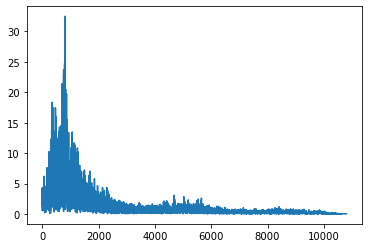

In [16]:
audio, sr = librosa.load(path+'115656.wav')
# 100 gets rid of lowest samples near 0 Hz to get rid of noise
plt.plot(abs(fft(audio[2*sr:sr*3])[sr//lbound:sr//2]))
freq = get_peakfreq(audio[2*sr:sr*3], sr, 0.8, lbound)
iddict['115656'] = [freq]
print(freq)
plt.show()
ipd.Audio(audio[4*sr:sr*5], rate=sr)

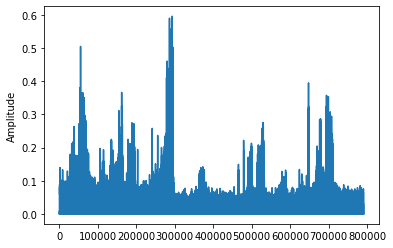

In [17]:
# extra
plot_sound(labels, path, '132026.wav')

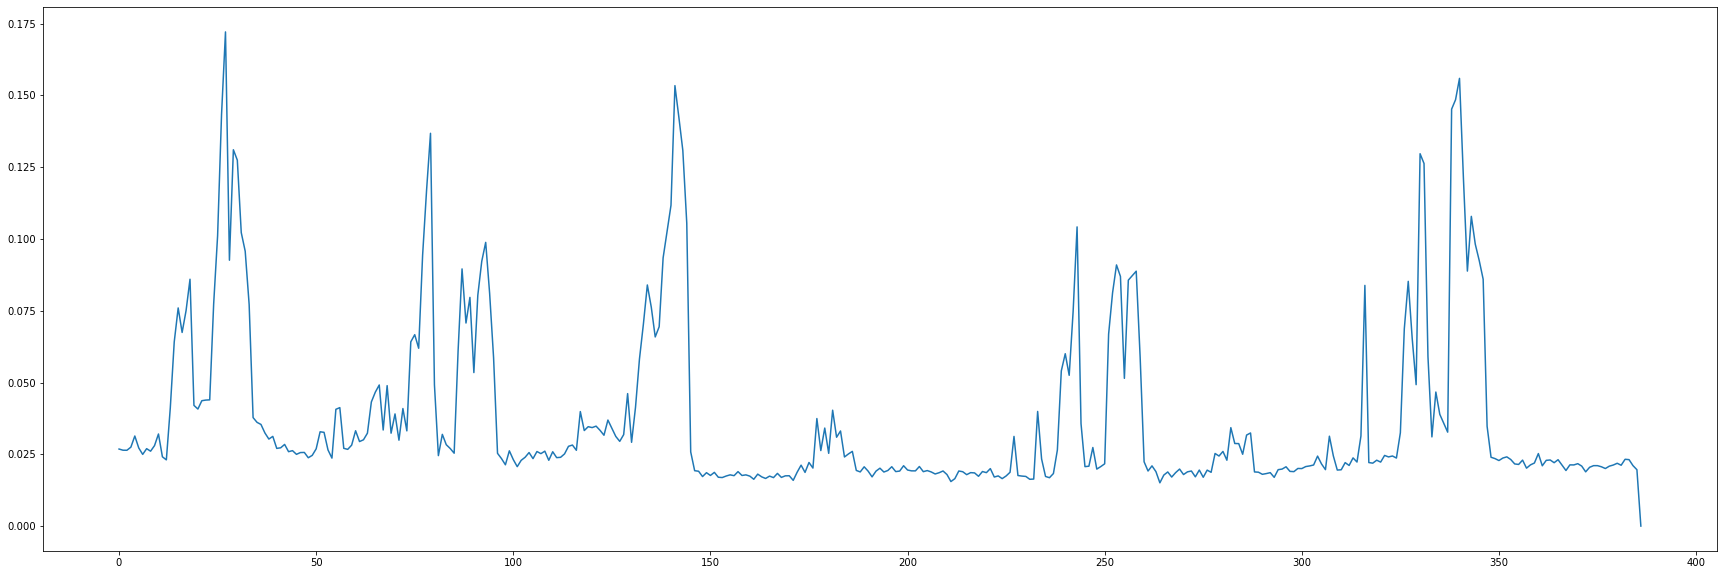

In [6]:
# Plot rms
hopsz = winsz = 2048
pt = rms_track(audio, hopsz, winsz)
plt.figure(figsize=(30,10))
plt.plot(pt)

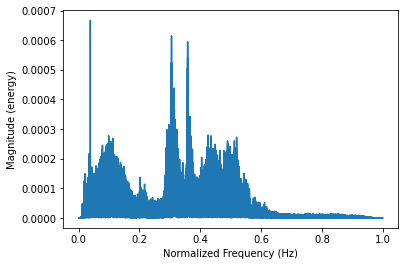

In [7]:
plt.magnitude_spectrum(audio)
plt.xlabel('Normalized Frequency (Hz)')
lows = np.where(audio<0.0003, 0, audio) # lower threshold
ipd.Audio(lows, rate=sr)

In [8]:
get_audio_thresh(path,'132026.wav',.87)

5.67 BPM


791154


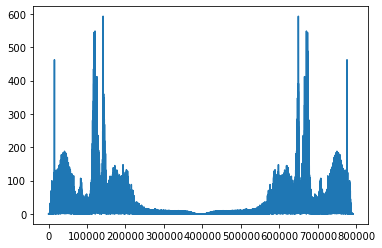

In [15]:
N = len(audio)
mid = sr // 2
plt.plot(abs(fft(audio)))

In [126]:
import json
def get_bird_type(fullname):
    splitfn = fullname.split()
    birdtype = splitfn[len(splitfn)-1]
    return birdtype
def check_then_add(d, longname, v):
    k = get_bird_type(longname)
    if k in d:
        d[k].append(v)
    else:
        d[k] = [v]
    return d

# Opening JSON file
f = open('ref.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)

# Iterating through the json
# list
# Add entries to dictionary where keys are  id's to list
birddict = {}
for r in data['recordings']:
    #print('id: %s, genus: %s, species: %s, name: %s' % (r['id'], r['gen'], r['sp'], r['en']))
    birddict = check_then_add(birddict, r['en'], r['id'])
    
# Closing file
f.close()

In [3]:
iddict_ = {'65815': [20.0, 9, [1, 1, 1, 1, 1, 2, 2, 1]],
 '65866': [16.0, 1, []],
 '66176': [533.7, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '65871': [3761.6666666666665, 2, [1]],
 '73493': [789.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '65874': [17.5, 7, [1, 2, 1, 1, 1, 3]],
 '65924': [186.625, 7, [1, 2, 2, 1, 1, 1]],
 '65930': [42.0, 4, [4, 3, 1]],
 '65926': [17.0, 8, [1, 1, 1, 2, 2, 1, 1]],
 '65939': [212.0, 8, [2, 1, 1, 1, 1, 1, 1]],
 '65941': [316.0, 9, [1, 2, 1, 1, 1, 1, 1, 1]],
 '65983': [212.0, 7, [1, 1, 2, 2, 3, 1]],
 '66013': [371.5, 6, [1, 1, 2, 2, 1]],
 '65990': [5557.0, 5, [1, 1, 2, 1]],
 '66033': [47.0, 5, [1, 1, 1, 5]],
 '66035': [4704.444444444444, 2, [1]],
 '121453': [3058.285714285714, 3, [3, 1]],
 '66037': [7432.380952380952, 5, [1, 1, 1, 3]],
 '66038': [6017.0, 6, [2, 3, 1, 2, 1]],
 '158964': [927.5, 6, [1, 1, 1, 1, 1]],
 '157678': [347.25, 9, [1, 1, 2, 1, 1, 1, 1, 1]],
 '66099': [2861.0, 4, [1, 3, 2]],
 '66091': [66.75, 2, [3]],
 '66103': [4875.4, 2, [6]],
 '66174': [7136.129032258064, 1, []],
 '66239': [766.9285714285714, 3, [1, 4]],
 '157580': [3347.5, 1, []],
 '66177': [3139.0, 4, [1, 1, 2]],
 '66240': [487.7, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '66241': [7280.625, 1, []],
 '90407': [2179.3333333333335, 2, [5]],
 '67086': [4816.714285714285, 2, [3]],
 '116589': [605.375, 7, [1, 1, 1, 1, 2, 2]],
 '73494': [13.333333333333334, 4, [1, 4, 4]],
 '73495': [48.5, 6, [1, 2, 2, 1, 1]],
 '73496': [108.5, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '116590': [742.0625, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '73497': [2947.285714285714, 3, [1, 1]],
 '159120': [858.3333333333334, 2, [1]],
 '73498': [5233.153846153846, 1, []],
 '73499': [3514.7272727272725, 3, [1, 1]],
 '73500': [237.0, 3, [6, 1]],
 '158974': [2952.5714285714284, 1, []],
 '73501': [26.0, 3, [6, 2]],
 '73502': [715.0, 7, [1, 2, 1, 2, 1, 2]],
 '73503': [181.57142857142858, 5, [2, 2, 1, 2]],
 '73504': [2409.1, 5, [1, 1, 1, 2]],
 '74418': [67.0, 2, [1]],
 '157430': [1873.5, 2, [1]],
 '76628': [404.22222222222223, 1, []],
 '79658': [923.0, 2, [1]],
 '79657': [3383.0, 1, []],
 '76632': [19.0, 3, [1, 2]],
 '156739': [313.1666666666667, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '82848': [125.0, 2, [2]],
 '82849': [5098.384615384615, 1, []],
 '82850': [535.0, 4, [6, 2, 1]],
 '97639': [602.8, 1, []],
 '115656': [806.5, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '121094': [104.5, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '122640': [7557.5, 1, []],
 '123580': [3261.875, 1, []],
 '127371': [385.0, 8, [1, 1, 1, 2, 1, 2, 1]],
 '132026': [946.0, 9, [1, 1, 1, 1, 1, 2, 2, 1]],
 '137625': [5215.538461538462, 1, []],
 '141872': [804.0, 2, [1]],
 '141873': [7742.5, 1, []],
 '141875': [2365.2580645161293, 2, [1]],
 '141876': [7228.5161290322585, 2, [1]],
 '141877': [53.0, 2, [4]],
 '142824': [150.71428571428572, 4, [1, 1, 7]],
 '142827': [25.0, 2, [8]],
 '142828': [20.0, 5, [5, 1, 1, 2]],
 '156522': [4231.428571428572, 1, []],
 '156521': [3756.0, 2, [7]],
 '156217': [3608.5, 2, [1]],
 '156524': [19.0, 8, [2, 1, 1, 1, 1, 1, 1]],
 '156527': [1199.2, 2, [5]],
 '156526': [1321.375, 4, [1, 1, 1]],
 '156533': [1303.0, 2, [1]],
 '156528': [5227.444444444444, 3, [1, 1]],
 '156525': [5606.666666666667, 1, []],
 '158985': [165.33333333333334, 3, [4, 1]],
 '156530': [1314.75, 3, [1, 5]],
 '156535': [952.5, 2, [1]],
 '156529': [2649.090909090909, 1, []],
 '156729': [279.5, 3, [2, 1]],
 '156741': [6074.0, 8, [1, 1, 1, 1, 1, 1, 1]],
 '156767': [764.0, 1, []],
 '156770': [123.5, 9, [1, 1, 1, 1, 1, 2, 2, 1]],
 '156775': [67.0, 6, [2, 1, 3, 2, 1]],
 '156776': [3384.032258064516, 2, [1]],
 '156778': [128.375, 9, [1, 1, 1, 1, 1, 1, 1, 1]],
 '156727': [37.5, 2, [1]],
 '156785': [733.5, 1, []],
 '157431': [3.0, 4, [1, 1, 1]],
 '156738': [3261.5, 6, [1, 2, 1, 2, 1]],
 '156777': [850.0, 6, [1, 5, 1, 1, 1]],
 '156798': [6780.444444444444, 3, [5, 1]],
 '157432': [182.66666666666666, 1, []],
 '157579': [4052.75, 2, [2]],
 '157581': [1213.0, 1, []],
 '157577': [2945.0, 1, []],
 '156740': [913.0, 10, [2, 1, 1, 1, 1, 1, 1, 1, 1]],
 '157583': [3055.5, 1, []],
 '157585': [527.5, 3, [1, 1]],
 '157587': [107.0, 1, []],
 '157588': [4020.6666666666665, 2, [6]],
 '157591': [3173.5, 2, [1]],
 '157595': [4601.875, 1, []],
 '157598': [1340.4285714285713, 7, [4, 1, 1, 1, 1, 1]],
 '157604': [7196.617021276596, 1, []],
 '157608': [212.5, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '157619': [4837.272727272727, 1, []],
 '157640': [2575.9444444444443, 8, [1, 1, 1, 2, 1, 1, 1]],
 '157679': [5194.272727272727, 1, []],
 '157680': [76.66666666666667, 2, [1]],
 '157681': [4187.318181818182, 1, []],
 '157682': [4651.4, 3, [1, 2]],
 '159182': [324.0, 3, [2, 3]],
 '158416': [8576.111111111111, 2, [1]],
 '157683': [729.1538461538462, 1, []],
 '158535': [1897.923076923077, 1, []],
 '158912': [195.0, 5, [1, 2, 1, 3]],
 '158913': [68.0, 4, [1, 2, 5]],
 '158914': [6676.5, 1, []],
 '158917': [3931.9193548387098, 1, []],
 '158918': [474.1, 8, [2, 1, 1, 1, 1, 1, 1]],
 '158957': [835.8333333333334, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '159532': [129.5, 6, [3, 1, 1, 1, 2]],
 '158958': [6932.0, 1, []],
 '158959': [824.4545454545455, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '158960': [6631.896551724138, 1, []],
 '158961': [2337.4285714285716, 4, [7, 1, 1]],
 '158962': [734.1666666666666, 2, [9]],
 '158963': [34.0, 3, [2, 3]],
 '158965': [64.0, 7, [1, 1, 1, 2, 1, 1]],
 '158966': [15.0, 1, []],
 '158967': [6208.2, 2, [1]],
 '158969': [8318.5, 1, []],
 '158971': [3641.3333333333335, 3, [1, 2]],
 '158972': [5710.0, 1, []],
 '158973': [1072.0, 2, [6]],
 '158975': [744.7, 6, [1, 2, 1, 1, 2]],
 '158976': [29.5, 1, []],
 '158978': [2943.0, 1, []],
 '158979': [7077.5, 1, []],
 '158980': [3168.0, 1, []],
 '158981': [3545.25, 1, []],
 '159396': [701.5, 1, []],
 '158982': [4936.2307692307695, 2, [6]],
 '158983': [4489.785714285715, 6, [1, 1, 1, 1, 1]],
 '159454': [606.1428571428571, 2, [4]],
 '159391': [213.0, 4, [1, 2, 2]],
 '159135': [3058.0, 3, [6, 1]],
 '159387': [110.83333333333333, 2, [3]],
 '159523': [6559.369565217391, 1, []],
 '159497': [201.35714285714286, 2, [1]],
 '158987': [6558.409090909091, 1, []],
 '159119': [593.7272727272727, 2, [8]],
 '159456': [1839.0, 3, [1, 2]],
 '159121': [864.8947368421053, 1, []],
 '159122': [984.0, 6, [1, 2, 2, 3, 1]],
 '159123': [858.1111111111111, 1, []],
 '159441': [592.1111111111111, 2, [1]],
 '159124': [718.3333333333334, 2, [4]],
 '159125': [4334.0, 1, []],
 '159499': [6653.625, 3, [1, 1]],
 '159529': [6984.8490566037735, 1, []],
 '159377': [1319.0, 2, [3]],
 '159266': [1612.0, 1, []],
 '159126': [4902.03125, 1, []],
 '159436': [1883.4375, 5, [3, 1, 2, 1]],
 '159127': [4234.857142857143, 3, [1, 4]],
 '159128': [4084.0, 2, [1]],
 '159548': [3873.542857142857, 4, [4, 1, 2]],
 '159129': [3507.5925925925926, 1, []],
 '159130': [7371.2444444444445, 1, []],
 '159527': [102.5, 5, [1, 1, 1, 1]],
 '159271': [3.0, 4, [3, 3, 2]],
 '159131': [171.4, 1, []],
 '159132': [25.4, 4, [1, 7, 1]],
 '159368': [2303.866666666667, 3, [1, 1]],
 '159133': [2990.6428571428573, 1, []],
 '159775': [3884.839285714286, 2, [6]],
 '159259': [6043.0, 3, [1, 1]],
 '159134': [5372.058823529412, 1, []],
 '159136': [23.0, 7, [2, 1, 1, 3, 1, 1]],
 '159137': [154.5, 1, []],
 '159138': [4725.5, 2, [1]],
 '159139': [5996.066666666667, 2, [1]],
 '159140': [3572.777777777778, 1, []],
 '159389': [5698.2307692307695, 2, [1]],
 '159141': [36.25, 5, [3, 1, 3, 2]],
 '159546': [162.0, 4, [1, 1, 1]],
 '159501': [100.0, 3, [1, 2]],
 '159145': [213.0, 1, []],
 '159520': [584.2, 6, [1, 1, 1, 2, 1]],
 '159147': [213.0, 1, []],
 '159148': [213.0, 7, [1, 1, 2, 2, 1, 2]],
 '159150': [1304.6, 2, [4]],
 '159547': [172.0, 1, []],
 '159545': [213.0, 5, [1, 1, 1, 2]],
 '159151': [557.5, 5, [1, 1, 1, 4]],
 '159533': [3560.6, 2, [2]],
 '159177': [7163.5, 2, [1]],
 '159178': [3940.1111111111113, 1, []],
 '159179': [655.2, 1, []],
 '159275': [53.5, 1, []],
 '159540': [1564.0, 1, []],
 '159183': [432.0, 3, [1, 1]],
 '159184': [182.66666666666666, 1, []],
 '159552': [2977.6153846153848, 5, [1, 1, 1, 2]],
 '160242': [98.5, 2, [3]],
 '159556': [3026.0833333333335, 1, []],
 '159254': [395.5, 8, [1, 1, 1, 1, 1, 2, 2]],
 '159255': [2455.6666666666665, 1, []],
 '159257': [3029.2272727272725, 2, [1]],
 '159258': [2.0, 2, [2]],
 '159686': [1454.0, 2, [1]],
 '159262': [2567.269230769231, 1, []],
 '159144': [213.0, 3, [1, 1]],
 '159263': [7102.72972972973, 1, []],
 '159264': [5840.555555555556, 1, []],
 '159698': [778.7142857142857, 1, []],
 '159267': [7315.314814814815, 1, []],
 '159268': [3980.6111111111113, 5, [4, 2, 3, 1]],
 '159270': [36.5, 5, [1, 1, 1, 1]],
 '159272': [392.5, 3, [4, 1]],
 '159273': [704.6842105263158, 8, [1, 2, 2, 1, 1, 1, 1]],
 '159274': [420.0, 2, [2]],
 '159276': [213.0, 2, [4]],
 '159277': [40.2, 1, []],
 '159361': [6055.55, 1, []],
 '159362': [862.0, 3, [1, 1]],
 '159363': [299.3333333333333, 4, [1, 3, 1]],
 '159364': [857.6666666666666, 1, []],
 '159365': [4429.8421052631575, 2, [9]],
 '159367': [213.0, 2, [4]],
 '159366': [4672.5, 1, []],
 '159371': [2641.1428571428573, 1, []],
 '159795': [28.0, 3, [1, 7]],
 '159796': [26.125, 8, [1, 2, 2, 2, 1, 1, 1]],
 '159376': [6395.777777777777, 2, [2]],
 '159378': [7640.0, 1, []],
 '159809': [5511.866666666667, 2, [4]],
 '159380': [4010.7619047619046, 3, [4, 1]],
 '159382': [111.0, 1, []],
 '160049': [644.5, 2, [6]],
 '159384': [39.0, 1, []],
 '159386': [213.0, 2, [7]],
 '159388': [1991.0, 3, [4, 2]],
 '159395': [4660.875, 1, []],
 '159390': [144.5, 4, [1, 1, 1]],
 '159880': [1222.0, 1, []],
 '159393': [315.5, 2, [5]],
 '159727': [605.5454545454545, 9, [1, 1, 3, 1, 1, 1, 1, 1]],
 '159397': [1029.8, 1, []],
 '159399': [213.0, 8, [2, 1, 1, 1, 1, 2, 1]],
 '159697': [75.0, 1, []],
 '159432': [336.0, 2, [1]],
 '159433': [2406.4, 2, [1]],
 '159434': [150.25, 1, []],
 '159438': [56.0, 7, [1, 1, 1, 4, 1, 1]],
 '159439': [26.0, 4, [1, 1, 6]],
 '159440': [562.6, 2, [3]],
 '159442': [73.0, 2, [1]],
 '159444': [110.25, 3, [1, 3]],
 '159445': [7383.107142857143, 3, [1, 1]],
 '159952': [1289.3333333333333, 3, [4, 6]],
 '159446': [776.5, 2, [9]],
 '159549': [192.0, 2, [1]],
 '159449': [6243.55, 2, [2]],
 '159450': [5892.923076923077, 1, []],
 '159452': [213.0, 1, []],
 '159453': [105.0, 2, [1]],
 '159153': [50.0, 3, [4, 5]],
 '159455': [760.9090909090909, 3, [1, 3]],
 '159496': [49.0, 5, [1, 1, 3, 4]],
 '159498': [115.4, 8, [1, 1, 1, 2, 2, 1, 1]],
 '159500': [692.7826086956521, 3, [2, 4]],
 '159518': [213.0, 3, [2, 1]],
 '159146': [213.0, 1, []],
 '159522': [6719.666666666667, 1, []],
 '159524': [2790.1666666666665, 1, []],
 '159976': [4509.0, 1, []],
 '159526': [4842.25, 5, [1, 1, 1, 2]],
 '159528': [271.57142857142856, 3, [1, 4]],
 '159530': [2488.0, 1, []],
 '159531': [3246.0588235294117, 3, [1, 9]],
 '159152': [7588.35294117647, 1, []],
 '159536': [6863.5, 1, []],
 '159539': [6869.684210526316, 1, []],
 '159788': [6538.48, 4, [1, 4, 1]],
 '160051': [658.375, 4, [2, 1, 4]],
 '159729': [1968.0, 6, [1, 1, 1, 1, 3]],
 '159543': [230.0, 1, []],
 '159544': [220.5, 2, [1]],
 '159670': [65.8, 3, [3, 1]],
 '159550': [214.0, 2, [1]],
 '159551': [2977.6153846153848, 5, [1, 1, 1, 2]],
 '159941': [6123.5, 2, [1]],
 '159768': [123.0, 1, []],
 '159873': [6610.615384615385, 1, []],
 '159186': [3565.235294117647, 4, [5, 1, 1]],
 '159553': [3118.0833333333335, 2, [2]],
 '160201': [841.7692307692307, 6, [1, 1, 1, 1, 1]],
 '159851': [3823.6666666666665, 3, [1, 1]],
 '159826': [32.5, 6, [1, 1, 1, 1, 4]],
 '159942': [7172.0, 2, [1]],
 '160250': [3681.6, 7, [1, 3, 1, 1, 3, 1]],
 '160262': [206.0, 1, []],
 '159730': [584.5, 2, [1]],
 '159554': [1285.2777777777778, 2, [4]],
 '159555': [133.0, 2, [1]],
 '159668': [4904.0, 3, [4, 4]],
 '159669': [5632.615384615385, 1, []],
 '159260': [203.0, 1, []],
 '159261': [793.0, 5, [4, 3, 1, 1]],
 '161454': [9.0, 8, [1, 1, 1, 1, 1, 2, 2]],
 '159725': [260.0, 2, [1]],
 '159689': [436.0, 5, [1, 1, 4, 1]],
 '159690': [41.0, 6, [1, 1, 1, 2, 4]],
 '159691': [65.75, 3, [2, 1]],
 '159696': [4044.96875, 1, []],
 '159265': [5228.666666666667, 1, []],
 '159699': [5070.3, 3, [1, 1]],
 '159935': [917.5, 1, []],
 '159700': [3325.0, 2, [1]],
 '159711': [2863.0, 2, [5]],
 '159712': [213.0, 4, [4, 2, 1]],
 '159713': [1014.5714285714286, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '159714': [819.0, 1, []],
 '159715': [3059.769230769231, 5, [1, 1, 1, 1]],
 '159883': [3887.8, 1, []],
 '159731': [2309.0, 3, [2, 3]],
 '159732': [836.75, 4, [2, 1, 1]],
 '159733': [212.0, 4, [2, 1, 3]],
 '159765': [2849.8571428571427, 2, [3]],
 '159766': [4570.102564102564, 1, []],
 '159771': [25.0, 1, []],
 '159769': [792.0, 3, [3, 3]],
 '159770': [3283.0, 2, [1]],
 '159773': [928.1428571428571, 2, [1]],
 '159774': [3995.5333333333333, 2, [1]],
 '159360': [348.57142857142856, 4, [6, 1, 2]],
 '159812': [6997.8, 2, [5]],
 '159776': [3037.5833333333335, 1, []],
 '159778': [91.0, 1, []],
 '159785': [212.0, 2, [4]],
 '159930': [6798.571428571428, 1, []],
 '159787': [604.0, 2, [7]],
 '159789': [20.0, 3, [1, 1]],
 '159790': [7851.086956521739, 1, []],
 '159791': [5002.376623376624, 3, [1, 1]],
 '159793': [309.0, 7, [1, 4, 1, 2, 1, 1]],
 '159374': [2718.6, 1, []],
 '159375': [712.3333333333334, 2, [1]],
 '159797': [213.0, 1, []],
 '159798': [213.0, 3, [1, 6]],
 '159807': [517.5, 2, [4]],
 '159808': [77.0, 6, [2, 1, 1, 1, 3]],
 '159379': [4464.555555555556, 2, [2]],
 '159810': [30.875, 1, []],
 '159978': [111.0, 2, [9]],
 '159811': [4172.333333333333, 2, [1]],
 '159813': [3742.6666666666665, 1, []],
 '159814': [602.0, 2, [1]],
 '159815': [686.7777777777778, 2, [1]],
 '159878': [89.33333333333333, 2, [7]],
 '159816': [3723.5625, 1, []],
 '163652': [2564.8333333333335, 1, []],
 '159875': [213.0, 3, [3, 2]],
 '159876': [1018.8888888888889, 1, []],
 '159879': [496.0, 4, [1, 6, 1]],
 '159392': [213.0, 1, []],
 '159881': [978.8, 1, []],
 '159882': [4084.25, 2, [1]],
 '159884': [512.0, 2, [6]],
 '159885': [2920.176470588235, 1, []],
 '159886': [818.5333333333333, 6, [2, 1, 1, 1, 3]],
 '159931': [2225.0, 1, []],
 '159932': [1953.3333333333333, 1, []],
 '159933': [2815.9333333333334, 3, [1, 2]],
 '164309': [3064.0833333333335, 2, [1]],
 '159936': [1282.142857142857, 2, [3]],
 '159937': [5637.666666666667, 1, []],
 '159938': [107.0, 2, [1]],
 '159939': [5312.538461538462, 3, [4, 1]],
 '159940': [78.0, 6, [2, 1, 1, 1, 1]],
 '159943': [1518.5, 1, []],
 '159443': [37.0, 1, []],
 '159944': [490.6666666666667, 3, [1, 5]],
 '159948': [4852.714285714285, 1, []],
 '159949': [859.4, 5, [1, 3, 4, 1]],
 '159950': [23.25, 3, [4, 5]],
 '159951': [325.5, 3, [1, 2]],
 '159447': [743.8333333333334, 3, [1, 2]],
 '159451': [6458.0, 3, [4, 3]],
 '159972': [6209.333333333333, 1, []],
 '160056': [3148.4, 1, []],
 '356491': [1158.5, 1, []],
 '469350': [2501.25, 6, [1, 1, 1, 1, 3]],
 '159979': [74.0, 3, [1, 1]],
 '160005': [59.4, 3, [3, 4]],
 '159966': [2982.8333333333335, 4, [3, 1, 2]],
 '160067': [601.7272727272727, 2, [1]],
 '159967': [895.0, 1, []],
 '159968': [637.1666666666666, 1, []],
 '159969': [6864.090909090909, 1, []],
 '159534': [962.6, 2, [6]],
 '159970': [2537.875, 1, []],
 '159971': [2834.0, 5, [1, 3, 1, 4]],
 '159973': [2879.6666666666665, 4, [4, 1, 1]],
 '159974': [2.5, 2, [2]],
 '159975': [8650.354838709678, 1, []],
 '159525': [4510.327272727272, 3, [1, 7]],
 '159977': [200.66666666666666, 2, [3]],
 '159980': [138.66666666666666, 1, []],
 '159981': [6289.909090909091, 2, [3]],
 '159999': [1241.5, 1, []],
 '160000': [81.0, 3, [1, 1]],
 '160001': [7650.5, 4, [2, 3, 1]],
 '160003': [241.11111111111111, 2, [5]],
 '160004': [195.5, 5, [4, 1, 1, 1]],
 '160006': [42.0, 2, [5]],
 '160068': [1831.0, 2, [1]],
 '661074': [2404.1428571428573, 3, [1, 5]],
 '160075': [57.5, 4, [2, 1, 5]],
 '160008': [2650.25, 6, [1, 2, 1, 1, 1]],
 '160009': [206.0, 2, [1]],
 '160010': [206.0, 1, []],
 '160011': [206.0, 2, [6]],
 '160129': [411.5, 2, [2]],
 '160013': [353.0, 5, [1, 2, 2, 5]],
 '661079': [1487.5, 1, []],
 '661084': [575.6, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '160015': [5472.428571428572, 3, [1, 6]],
 '160016': [2258.25, 1, []],
 '160037': [5583.4, 2, [2]],
 '661913': [907.2, 1, []],
 '160039': [446.375, 2, [1]],
 '160040': [3522.5, 3, [2, 3]],
 '160041': [5395.888888888889, 2, [6]],
 '160042': [269.8181818181818, 1, []],
 '160043': [164.0, 3, [2, 1]],
 '160126': [176.66666666666666, 1, []],
 '160044': [396.6875, 1, []],
 '160045': [685.0, 1, []],
 '160046': [1132.0, 2, [7]],
 '160047': [923.3333333333334, 2, [5]],
 '160119': [206.5, 4, [4, 1, 2]],
 '160048': [494.5, 2, [2]],
 '159535': [5423.071428571428, 3, [2, 1]],
 '160050': [17.666666666666668, 1, []],
 '159180': [5965.133333333333, 2, [4]],
 '159541': [6862.076923076923, 2, [1]],
 '160073': [194.57142857142858, 2, [5]],
 '160052': [207.0, 2, [2]],
 '160053': [7217.5, 3, [6, 1]],
 '678338': [690.25, 1, []],
 '160055': [3838.0, 1, []],
 '160057': [1639.7142857142858, 4, [1, 1, 5]],
 '160058': [93.5, 5, [4, 1, 2, 1]],
 '160059': [39.0, 1, []],
 '160060': [7009.5, 1, []],
 '160061': [351.44444444444446, 3, [5, 1]],
 '160062': [6128.0, 4, [3, 3, 1]],
 '683701': [1587.5, 1, []],
 '160064': [761.0, 4, [1, 2, 1]],
 '160065': [3190.6666666666665, 4, [1, 3, 2]],
 '160066': [505.8333333333333, 5, [2, 1, 1, 2]],
 '160069': [7692.65, 1, []],
 '160070': [84.0, 2, [2]],
 '160071': [669.0, 4, [1, 4, 3]],
 '160072': [206.0, 6, [1, 1, 1, 3, 2]],
 '686463': [773.6666666666666, 1, []],
 '160076': [1544.1666666666667, 4, [1, 1, 1]],
 '160077': [16.0, 3, [7, 1]],
 '160078': [6785.5, 2, [7]],
 '160079': [3907.1666666666665, 3, [7, 1]],
 '160080': [589.0, 4, [2, 2, 1]],
 '160081': [113.875, 4, [2, 1, 1]],
 '160112': [4574.2, 2, [9]],
 '689442': [4100.181818181818, 2, [1]],
 '160115': [3380.0, 2, [1]],
 '160116': [2119.6666666666665, 4, [1, 3, 4]],
 '160117': [41.0, 1, []],
 '160118': [299.0, 1, []],
 '160120': [206.0, 4, [2, 4, 1]],
 '160121': [206.0, 2, [6]],
 '160122': [144.0, 2, [1]],
 '160123': [144.0, 2, [1]],
 '690684': [795.4117647058823, 7, [1, 1, 2, 1, 4, 1]],
 '160124': [35.0, 3, [1, 2]],
 '160127': [5111.5, 1, []],
 '160128': [5448.692307692308, 1, []],
 '160130': [2300.3333333333335, 7, [5, 1, 1, 1, 1, 1]],
 '160132': [5576.0, 2, [2]],
 '160133': [55.5, 2, [7]],
 '696087': [984.7391304347826, 8, [1, 1, 1, 2, 1, 1, 2]],
 '696429': [2240.4, 1, []],
 '701094': [691.8125, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '160158': [4226.5, 5, [2, 2, 1, 1]],
 '160152': [2647.0, 3, [2, 3]],
 '160134': [319.0, 1, []],
 '159385': [213.0, 5, [2, 1, 2, 1]],
 '160146': [18.0, 1, []],
 '160164': [142.0, 1, []],
 '160190': [3486.0, 1, []],
 '160150': [114.83333333333333, 1, []],
 '160266': [5639.363636363636, 4, [1, 1, 1]],
 '160187': [38.0, 1, []],
 '160241': [20.0, 3, [1, 1]],
 '161418': [128.0, 2, [3]],
 '160135': [2491.3, 3, [1, 2]],
 '160272': [1295.625, 5, [2, 3, 1, 1]],
 '160136': [1256.8333333333333, 5, [3, 2, 1, 1]],
 '160137': [1943.2857142857142, 3, [7, 1]],
 '160138': [20.0, 1, []],
 '160139': [28.0, 1, []],
 '160140': [4.5, 3, [2, 2]],
 '160141': [735.125, 1, []],
 '160274': [5808.0, 1, []],
 '160240': [206.75, 1, []],
 '160143': [3990.0588235294117, 3, [4, 1]],
 '160144': [4889.3, 1, []],
 '160147': [2368.6, 4, [2, 1, 1]],
 '160151': [72.5, 1, []],
 '160153': [2491.5, 2, [1]],
 '160156': [3848.0, 1, []],
 '160157': [4184.081632653061, 1, []],
 '160159': [15.0, 3, [5, 1]],
 '160160': [31.0, 1, []],
 '160161': [207.42857142857142, 1, []],
 '160162': [16.5, 6, [1, 3, 1, 2, 1]],
 '160163': [143.5, 3, [1, 1]],
 '161633': [1649.3333333333333, 4, [1, 1, 1]],
 '160165': [958.0625, 1, []],
 '160166': [383.0, 3, [1, 3]],
 '160169': [489.5, 1, []],
 '160185': [321.6, 3, [1, 5]],
 '160186': [18.0, 5, [3, 3, 1, 1]],
 '160192': [2430.3076923076924, 1, []],
 '160194': [5625.5, 1, []],
 '160195': [8768.833333333334, 6, [1, 1, 2, 2, 1]],
 '160197': [72.83333333333333, 2, [1]],
 '160199': [77.0, 1, []],
 '160200': [3389.5, 2, [7]],
 '160202': [518.3333333333334, 9, [1, 1, 1, 1, 1, 2, 1, 1]],
 '160203': [518.3333333333334, 9, [1, 1, 1, 1, 1, 2, 1, 1]],
 '160204': [716.6666666666666, 3, [2, 1]],
 '160235': [115.0, 1, []],
 '160236': [203.5, 4, [3, 3, 4]],
 '160237': [204.0, 1, []],
 '160238': [345.0, 7, [1, 1, 1, 2, 2, 1]],
 '160239': [2797.8571428571427, 3, [1, 5]],
 '160243': [48.0, 3, [5, 2]],
 '160248': [207.0, 4, [2, 1, 1]],
 '160249': [64.75, 2, [1]],
 '160251': [5318.625, 9, [1, 1, 1, 2, 2, 1, 1, 1]],
 '160252': [690.4285714285714, 2, [1]],
 '160253': [1381.35, 2, [1]],
 '160254': [3761.0, 1, []],
 '160255': [3280.5, 4, [3, 3, 1]],
 '160257': [2284.1666666666665, 2, [1]],
 '160258': [4216.833333333333, 2, [2]],
 '161890': [1108.875, 1, []],
 '160259': [6692.0, 2, [2]],
 '160261': [206.0, 1, []],
 '160264': [79.0, 1, []],
 '160265': [206.0, 3, [2, 1]],
 '160267': [2352.0, 4, [1, 3, 3]],
 '160270': [123.0, 5, [4, 1, 1, 2]],
 '161646': [2565.6363636363635, 4, [2, 1, 4]],
 '160271': [49.0, 1, []],
 '161888': [85.4, 3, [1, 5]],
 '160273': [206.0, 1, []],
 '160276': [1013.4285714285714, 5, [1, 1, 5, 1]],
 '160277': [9.0, 7, [1, 1, 1, 1, 1, 1]],
 '160279': [4068.5714285714284, 2, [4]],
 '161151': [991.0, 3, [4, 2]],
 '161419': [33.0, 8, [1, 1, 1, 1, 1, 1, 1]],
 '160247': [207.0, 2, [1]],
 '161436': [52.0, 7, [2, 1, 1, 1, 1, 1]],
 '161443': [3921.8333333333335, 2, [6]],
 '161444': [3069.6666666666665, 2, [1]],
 '161449': [20.0, 4, [1, 5, 3]],
 '159687': [68.0, 2, [1]],
 '161634': [2316.25, 3, [3, 2]],
 '161675': [2603.777777777778, 9, [1, 1, 2, 1, 2, 1, 1, 1]],
 '161635': [3919.5, 1, []],
 '161639': [4415.5, 3, [1, 1]],
 '161642': [50.25, 2, [5]],
 '161643': [283.75, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '161644': [5123.190476190476, 3, [1, 3]],
 '161647': [3218.2727272727275, 1, []],
 '161667': [3682.5, 4, [1, 1, 1]],
 '161889': [2510.076923076923, 1, []],
 '162497': [40.666666666666664, 4, [4, 2, 2]],
 '163600': [340.5, 7, [2, 1, 1, 1, 1, 1]],
 '163613': [822.5, 1, []],
 '163614': [3454.8888888888887, 1, []],
 '163618': [1483.1, 1, []],
 '159772': [7766.0, 1, []],
 '163620': [4244.452380952381, 4, [3, 1, 1]],
 '163621': [7684.0, 2, [1]],
 '163625': [182.83333333333334, 8, [1, 1, 2, 1, 1, 1, 2]],
 '163627': [821.5, 5, [1, 1, 1, 2]],
 '163630': [588.0, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '163631': [1498.857142857143, 8, [1, 1, 1, 1, 1, 2, 1]],
 '163632': [3649.6666666666665, 4, [1, 1, 3]],
 '163633': [5758.333333333333, 1, []],
 '163635': [2695.785714285714, 2, [1]],
 '163636': [4005.0, 3, [2, 1]],
 '159792': [411.90909090909093, 4, [1, 1, 2]],
 '163638': [46.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '163639': [243.5, 4, [1, 1, 7]],
 '163649': [142.4, 9, [1, 1, 1, 1, 1, 2, 1, 1]],
 '163643': [3180.8333333333335, 1, []],
 '163648': [4498.545454545455, 1, []],
 '163644': [905.6666666666666, 1, []],
 '163647': [8446.538461538461, 1, []],
 '163651': [7223.5, 4, [1, 1, 1]],
 '163650': [337.7857142857143, 9, [1, 1, 1, 1, 2, 1, 1, 1]],
 '164256': [2350.266666666667, 1, []],
 '164258': [4572.848484848485, 1, []],
 '164304': [4902.8, 1, []],
 '164257': [92.33333333333333, 5, [1, 3, 2, 1]],
 '164259': [3424.7, 1, []],
 '164299': [300.3333333333333, 3, [5, 1]],
 '163645': [1442.3333333333333, 3, [1, 1]],
 '163646': [48.0, 4, [1, 1, 5]],
 '159947': [807.5, 1, []],
 '160145': [41.57142857142857, 2, [1]],
 '161648': [1955.5, 4, [1, 2, 2]],
 '187484': [122.14285714285714, 9, [1, 1, 1, 1, 1, 1, 1, 1]],
 '160155': [206.5, 1, []],
 '648365': [598.125, 2, [1]],
 '160170': [1473.0, 3, [3, 2]],
 '160184': [7886.625, 3, [8, 1]],
 '160193': [3377.0, 1, []],
 '160198': [10.0, 1, []],
 '663105': [778.5833333333334, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '163642': [6778.636363636364, 3, [1, 1]],
 '683403': [969.1666666666666, 2, [2]],
 '696375': [729.9090909090909, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '678806': [207.0, 7, [1, 1, 1, 1, 1, 1]],
 '692655': [803.0, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '679453': [770.3333333333334, 10, [1, 1, 1, 1, 1, 1, 1, 2, 1]],
 '160149': [187.66666666666666, 3, [5, 1]],
 '160154': [2393.222222222222, 5, [1, 3, 2, 2]],
 '160168': [4352.666666666667, 1, []],
 '648358': [1146.25, 1, []],
 '163599': [1181.857142857143, 2, [1]],
 '183592': [656.7272727272727, 7, [1, 1, 1, 1, 1, 1]],
 '661105': [726.75, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '689823': [757.0, 10, [2, 1, 1, 1, 1, 1, 1, 1, 1]],
 '648360': [308.0, 5, [1, 2, 1, 1]],
 '686056': [3131.818181818182, 2, [2]],
 '179110': [3180.5, 2, [8]],
 '169035': [1990.25, 8, [1, 1, 2, 1, 2, 1, 1]],
 '326857': [485.42857142857144, 1, []],
 '648354': [487.25, 2, [7]],
 '648352': [365.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '663106': [2506.1, 1, []],
 '661078': [1766.857142857143, 1, []],
 '477062': [796.3571428571429, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '558111': [2418.0, 2, [1]],
 '663408': [746.0, 2, [5]],
 '682570': [1420.0625, 7, [1, 1, 1, 1, 4, 1]],
 '686054': [704.5, 1, []],
 '160282': [133.0, 1, []],
 '182564': [157.14285714285714, 2, [1]],
 '160281': [419.4, 1, []],
 '181593': [199.0, 6, [1, 1, 1, 5, 1]],
 '179116': [3679.3333333333335, 1, []],
 '169633': [64.0, 3, [1, 1]],
 '182410': [693.3333333333334, 2, [2]],
 '182408': [3054.0, 4, [2, 6, 1]],
 '159934': [2882.0, 1, []],
 '182080': [4559.210526315789, 1, []],
 '182566': [3374.75, 2, [1]],
 '182565': [5401.5, 1, []],
 '182545': [6350.8, 1, []],
 '171846': [5011.75, 3, [3, 3]],
 '164308': [53.0, 8, [1, 1, 1, 3, 1, 1, 1]],
 '647164': [222.0, 4, [1, 1, 1]],
 '647817': [187.0, 2, [3]],
 '649850': [645.75, 1, []],
 '647167': [162.33333333333334, 2, [1]],
 '649297': [1145.3636363636363, 1, []],
 '649294': [23.428571428571427, 4, [3, 1, 1]],
 '648368': [589.0, 5, [1, 1, 1, 1]],
 '648078': [5092.0, 1, []],
 '649303': [2989.0526315789475, 1, []],
 '649302': [140.6, 5, [1, 1, 1, 1]],
 '649847': [559.3333333333334, 4, [1, 1, 1]],
 '649311': [138.83333333333334, 1, []],
 '649306': [388.42857142857144, 3, [1, 1]],
 '651197': [233.0, 4, [1, 1, 1]],
 '650827': [2651.2727272727275, 1, []],
 '649854': [3886.318181818182, 1, []],
 '660894': [1320.2857142857142, 1, []],
 '657981': [233.77777777777777, 2, [1]],
 '654848': [4289.787878787879, 2, [1]],
 '653388': [3604.2631578947367, 2, [1]],
 '160007': [3546.7619047619046, 1, []],
 '660900': [3213.6666666666665, 3, [1, 1]],
 '660898': [633.1, 4, [1, 2, 1]],
 '660895': [970.0, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '160014': [102.25, 1, []],
 '661075': [833.0666666666667, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '160012': [3510.1428571428573, 2, [2]],
 '661911': [805.7272727272727, 3, [2, 8]],
 '661914': [1033.0, 2, [7]],
 '160038': [6274.5, 1, []],
 '676870': [290.0, 1, []],
 '670406': [48.0, 8, [1, 2, 1, 1, 1, 1, 1]],
 '160054': [81.5, 2, [1]],
 '670404': [731.8, 10, [1, 1, 1, 1, 1, 2, 1, 1, 1]],
 '669457': [545.3333333333334, 5, [1, 1, 1, 1]],
 '676906': [1432.375, 2, [1]],
 '676902': [981.6428571428571, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '676895': [844.5, 10, [1, 1, 1, 1, 1, 1, 1, 1, 2]],
 '676876': [1010.4, 5, [2, 2, 1, 1]],
 '678333': [620.2, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '677543': [854.4736842105264, 1, []],
 '677542': [682.8181818181819, 7, [1, 1, 1, 1, 1, 1]],
 '678807': [878.5555555555555, 2, [1]],
 '678366': [790.3333333333334, 1, []],
 '679723': [451.6666666666667, 1, []],
 '679458': [4687.8125, 1, []],
 '679454': [3232.8, 1, []],
 '679452': [1237.1875, 8, [1, 1, 1, 4, 1, 1, 1]],
 '684891': [708.5714285714286, 1, []],
 '682571': [3552.0, 1, []],
 '685871': [12.615384615384615, 1, []],
 '685679': [476.1666666666667, 1, []],
 '685677': [4721.571428571428, 1, []],
 '685311': [791.5, 4, [2, 5, 2]],
 '160074': [679.8888888888889, 2, [1]],
 '686186': [929.2, 1, []],
 '686057': [593.2857142857143, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '687701': [4060.8214285714284, 2, [2]],
 '689824': [979.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '160113': [4479.615384615385, 2, [1]],
 '689441': [1007.5416666666666, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '688631': [2279.5, 7, [3, 1, 1, 1, 1, 1]],
 '689859': [51.0, 3, [1, 1]],
 '690092': [745.1666666666666, 5, [1, 1, 5, 2]],
 '691471': [37.5, 1, []],
 '690340': [7931.071428571428, 2, [1]],
 '690091': [718.0714285714286, 1, []],
 '691188': [1279.0, 1, []],
 '691187': [848.7368421052631, 2, [1]],
 '160125': [35.0, 3, [1, 2]],
 '696206': [3537.3333333333335, 2, [7]],
 '692318': [1111.8333333333333, 9, [1, 1, 1, 2, 1, 1, 2, 1]],
 '692779': [925.3333333333334, 9, [2, 1, 1, 1, 1, 1, 1, 1]],
 '698317': [1332.3, 6, [1, 1, 1, 2, 3]],
 '697755': [1561.6666666666667, 1, []],
 '696664': [535.5, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '701552': [861.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '701173': [835.6666666666666, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '702313': [786.6666666666666, 6, [1, 1, 1, 1, 1]],
 '183579': [10.0, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '702311': [812.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '701950': [671.9166666666666, 6, [1, 1, 2, 1, 1]],
 '701949': [853.2352941176471, 1, []],
 '706924': [609.8571428571429, 1, []],
 '706574': [1043.4, 10, [1, 1, 1, 2, 1, 1, 1, 1, 1]],
 '706573': [787.1111111111111, 3, [1, 3]],
 '706135': [862.2758620689655, 1, []],
 '65814': [48.857142857142854, 7, [1, 1, 1, 1, 2, 1]],
 '707217': [895.3333333333334, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '706925': [494.77777777777777, 1, []],
 '114400': [1593.2, 3, [2, 1]],
 '142832': [3411.9375, 1, []],
 '142831': [2218.285714285714, 3, [3, 1]],
 '156531': [949.1, 3, [1, 1]],
 '120847': [120.75, 7, [1, 1, 2, 1, 1, 1]],
 '157589': [3704.846153846154, 1, []],
 '156788': [71.57142857142857, 7, [1, 1, 1, 1, 1, 2]],
 '156742': [3681.0, 8, [1, 1, 1, 1, 1, 2, 1]],
 '156728': [15.0, 8, [1, 1, 2, 1, 1, 2, 1]],
 '158916': [7149.2, 3, [6, 2]],
 '157637': [324.5, 1, []],
 '159118': [195.0, 9, [1, 1, 1, 1, 1, 1, 1, 1]],
 '158977': [3962.75, 5, [1, 1, 1, 4]],
 '158970': [893.3333333333334, 5, [1, 7, 1, 1]],
 '158968': [3225.2, 4, [1, 1, 6]],
 '159187': [7356.571428571428, 1, []],
 '159185': [1703.5, 3, [1, 1]],
 '159149': [1336.0, 2, [2]],
 '159143': [995.25, 3, [1, 3]],
 '159372': [151.6, 2, [1]],
 '159256': [3901.125, 1, []],
 '182079': [4415.88, 2, [1]],
 '183580': [4179.16, 2, [3]],
 '179112': [8547.780487804877, 2, [1]],
 '183578': [3.0, 4, [1, 1, 5]],
 '183361': [838.8181818181819, 1, []],
 '183584': [130.33333333333334, 8, [1, 1, 1, 1, 1, 2, 2]],
 '183583': [87.4, 6, [1, 5, 1, 1, 1]],
 '159542': [752.6923076923077, 2, [7]],
 '159537': [573.5, 3, [6, 3]],
 '159448': [870.5, 5, [1, 1, 6, 1]],
 '159728': [4188.203389830508, 1, []],
 '159398': [91.33333333333333, 6, [1, 1, 1, 3, 1]],
 '159724': [48.5, 2, [1]],
 '159723': [211.75, 5, [2, 3, 2, 3]],
 '159786': [213.0, 2, [1]],
 '159794': [120.0, 3, [1, 2]],
 '159777': [213.0, 3, [2, 6]],
 '159767': [1025.0, 1, []],
 '160131': [376.0, 1, []],
 '160114': [2796.1666666666665, 1, []],
 '160002': [4988.375, 3, [1, 1]],
 '160188': [3712.529411764706, 1, []],
 '160189': [64.6, 1, []],
 '160167': [2441.3076923076924, 4, [1, 2, 2]],
 '160244': [7.0, 1, []],
 '160148': [43.0, 2, [2]],
 '160245': [158.77777777777777, 4, [1, 8, 1]],
 '160246': [26.0, 2, [2]],
 '160278': [684.8333333333334, 3, [3, 1]],
 '160196': [154.0909090909091, 1, []],
 '160191': [6462.571428571428, 2, [1]],
 '160263': [113.5, 2, [1]],
 '160260': [422.44444444444446, 4, [1, 1, 3]],
 '160909': [163.44444444444446, 1, []],
 '160283': [2508.4137931034484, 1, []],
 '161636': [21.5, 3, [3, 2]],
 '161428': [2645.0, 1, []],
 '160142': [42.25, 1, []],
 '183588': [58.0, 1, []],
 '183582': [4137.0, 3, [1, 1]],
 '183589': [140.0, 1, []],
 '183587': [5519.666666666667, 5, [1, 1, 1, 1]],
 '183594': [2956.4444444444443, 1, []],
 '183593': [128.5, 4, [1, 1, 1]],
 '183591': [926.4285714285714, 3, [2, 6]],
 '183590': [6110.857142857143, 1, []],
 '185176': [5700.424242424242, 1, []],
 '185178': [1856.5, 1, []],
 '185177': [2918.9, 2, [3]],
 '185182': [3440.0, 1, []],
 '185187': [64.0, 6, [1, 1, 1, 1, 5]],
 '185186': [2724.5, 3, [7, 1]],
 '185185': [1873.0, 1, []],
 '185184': [2873.4444444444443, 1, []],
 '187486': [4683.565217391304, 1, []],
 '187485': [947.75, 2, [1]],
 '210120': [4483.366666666667, 2, [3]],
 '199042': [5222.130434782609, 1, []],
 '198054': [26.0, 3, [5, 3]],
 '383429': [35.0, 10, [1, 2, 1, 1, 1, 1, 1, 1, 1]],
 '192964': [4507.413043478261, 1, []],
 '240745': [13.0, 2, [1]],
 '234341': [702.3333333333334, 1, []],
 '232496': [32.0, 5, [3, 1, 1, 2]],
 '175358': [152.0, 1, []],
 '210755': [3909.0, 1, []],
 '270294': [6195.333333333333, 1, []],
 '254790': [119.33333333333333, 4, [1, 1, 1]],
 '254339': [3796.0, 1, []],
 '355756': [9.0, 2, [1]],
 '319571': [2621.8, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '301092': [5719.333333333333, 1, []],
 '277923': [282.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '356483': [705.7, 5, [3, 1, 1, 1]],
 '371447': [32.0, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '370920': [8.0, 6, [2, 2, 1, 2, 2]],
 '366353': [2893.875, 4, [2, 2, 2]],
 '383428': [17.666666666666668, 5, [1, 3, 1, 1]],
 '433662': [4024.1428571428573, 3, [1, 1]],
 '379746': [6604.625, 1, []],
 '411047': [2086.25, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '397329': [2072.285714285714, 3, [1, 5]],
 '396690': [1557.0, 6, [1, 1, 1, 1, 1]],
 '445522': [185.92307692307693, 2, [6]],
 '391728': [6568.611111111111, 1, []],
 '425024': [624.0, 2, [1]],
 '425023': [63.0, 4, [1, 1, 1]],
 '421625': [703.8571428571429, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '411048': [3855.6666666666665, 1, []],
 '433219': [740.0, 3, [1, 1]],
 '425546': [185.5, 1, []],
 '432180': [2183.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '438455': [2771.5, 1, []],
 '435460': [128.0, 4, [1, 2, 4]],
 '435432': [5532.363636363636, 1, []],
 '473471': [1042.0, 5, [1, 1, 6, 1]],
 '454616': [2236.875, 1, []],
 '475742': [4544.75, 1, []],
 '475741': [4235.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '475740': [1009.125, 9, [1, 1, 1, 2, 1, 1, 1, 1]],
 '473760': [922.9285714285714, 1, []],
 '477061': [1330.5, 10, [1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '476735': [1348.2727272727273, 9, [1, 2, 1, 1, 2, 1, 1, 1]],
 '476734': [321.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '476732': [6.0, 10, [1, 1, 1, 1, 1, 1, 1, 1, 2]],
 '483995': [5168.5, 1, []],
 '481739': [57.0, 4, [1, 1, 1]],
 '478455': [684.3333333333334, 6, [2, 1, 1, 2, 1]],
 '477063': [5570.428571428572, 1, []],
 '509608': [2510.0, 2, [1]],
 '503284': [20.0, 2, [2]],
 '164310': [7862.785714285715, 2, [3]],
 '493473': [4962.5, 1, []],
 '486018': [4957.0, 2, [1]],
 '538001': [1230.0, 1, []],
 '537999': [2334.0, 9, [1, 1, 1, 1, 1, 1, 1, 1]],
 '537998': [997.5, 9, [1, 1, 1, 3, 1, 1, 1, 1]],
 '537997': [2209.0, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '553922': [7088.615384615385, 1, []],
 '628187': [1478.0, 2, [3]],
 '627715': [752.5, 2, [1]],
 '627564': [4729.666666666667, 2, [1]],
 '627562': [3686.0, 3, [1, 1]],
 '638584': [849.6, 4, [1, 1, 1]],
 '631204': [1541.3333333333333, 2, [2]],
 '631202': [2384.0, 7, [1, 1, 1, 1, 1, 2]],
 '631193': [6065.033333333334, 1, []],
 '647154': [3906.5555555555557, 1, []],
 '646483': [2954.0, 2, [1]],
 '638587': [624.0, 1, []],
 '647160': [2954.0, 2, [1]],
 '647158': [3933.3333333333335, 1, []],
 '647156': [87.5, 3, [1, 1]],
 '647155': [2736.5714285714284, 3, [3, 2]],
 '647162': [4773.0, 1, []],
 '647161': [5816.166666666667, 2, [1]],
 '159953': [63.5, 1, []],
 '179113': [3078.375, 2, [7]],
 '167989': [5123.214285714285, 2, [1]],
 '647163': [6740.555555555556, 1, []],
 '167977': [3233.75, 1, []],
 '161420': [20.0, 9, [2, 1, 1, 1, 1, 2, 1, 1]],
 '161663': [6154.545454545455, 2, [3]],
 '161674': [7809.5, 1, []],
 '163634': [19.0, 1, []],
 '163637': [1844.75, 2, [1]],
 '163653': [1299.3333333333333, 4, [1, 2, 1]],
 '159874': [4763.058823529412, 2, [5]],
 '164260': [63.285714285714285, 6, [2, 1, 1, 1, 2]],
 '164255': [92.75, 1, []],
 '165450': [47.5, 4, [1, 1, 1]],
 '167988': [320.6666666666667, 3, [4, 1]],
 '164307': [4457.92, 2, [1]],
 '690093': [1073.25, 1, []],
 '679450': [2797.4285714285716, 6, [1, 2, 1, 2, 1]],
 '647168': [4437.181818181818, 3, [1, 1]],
 '647165': [40.5, 3, [1, 1]],
 '649299': [26.333333333333332, 3, [3, 3]],
 '649304': [4720.0, 3, [2, 2]],
 '661089': [1230.0, 3, [1, 1]],
 '677541': [902.75, 4, [4, 1, 5]],
 '683551': [615.0, 4, [3, 2, 1]],
 '160063': [1332.7, 1, []],
 '687204': [799.3333333333334, 6, [1, 1, 1, 1, 1]],
 '686055': [2094.3333333333335, 2, [4]],
 '686536': [124.66666666666667, 3, [1, 1]],
 '687201': [469.2631578947368, 1, []],
 '687702': [669.8333333333334, 10, [1, 1, 2, 1, 1, 1, 1, 1, 1]],
 '687813': [1044.5, 4, [4, 2, 1]],
 '687203': [6989.75, 1, []],
 '699908': [6670.666666666667, 1, []],
 '707218': [909.6666666666666, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '158915': [8025.8, 3, [3, 1]],
 '183585': [2291.8, 1, []],
 '159688': [4333.222222222223, 3, [1, 3]],
 '160256': [3979.5, 5, [1, 2, 2, 2]],
 '160275': [63.0, 4, [1, 2, 5]],
 '183595': [4822.571428571428, 2, [1]],
 '183586': [977.5, 2, [1]],
 '185179': [5567.0, 3, [1, 1]],
 '185180': [2753.4545454545455, 2, [1]],
 '185181': [5909.375, 3, [1, 3]],
 '185183': [5390.0, 4, [2, 1, 2]],
 '179115': [3718.5, 1, []],
 '189998': [1893.0, 2, [7]],
 '264267': [1403.8, 11, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 '356495': [864.0, 1, []],
 '425540': [230.0, 1, []],
 '562162': [33.5, 2, [1]],
 '570694': [3780.0, 1, []],
 '627371': [416.8, 8, [2, 2, 1, 2, 1, 1, 1]],
 '638590': [1544.0, 5, [1, 1, 1, 1]]}

In [4]:
birddict = {'Goose': ['159949', '160186'],
 'Swan': ['696429'],
 'Duck': ['679723', '161436', '160050', '160049', '157581', '160185'],
 'Shoveler': ['159952', '161636'],
 'Wigeon': ['397329', '454616', '396690', '165450', '159951'],
 'Mallard': ['696664', '692779', '661079', '163618', '159275'],
 'Pintail': ['159953'],
 'Teal': ['161633', '142831'],
 'Merganser': ['161890', '142827', '65866', '142828', '156775', '161888'],
 'Quail': ['648360', '648358', '648354', '156533'],
 'Grebe': ['689859'],
 'Bittern': ['160043', '160042', '160036', '127371'],
 'Heron': ['160005'],
 'Cormorant': ['160073'],
 'Hawk': ['692318', '159446', '114400', '159438', '187482', '183586'],
 'Eagle': ['699908', '696087', '683701', '74418'],
 'Rail': ['701094',
  '691188',
  '687815',
  '687701',
  '686463',
  '686186',
  '686056',
  '679454',
  '159715',
  '66099',
  '161428',
  '159792',
  '159714',
  '159700',
  '159698',
  '157577',
  '160129',
  '159732',
  '159498',
  '159135',
  '159119',
  '159118'],
 'Sora': ['160203'],
 'Coot': ['159789'],
 'Oystercatcher': ['469350'],
 'Plover': ['161419'],
 'Killdeer': ['183593', '159950'],
 'Surfbird': ['160909'],
 'Dunlin': ['161418'],
 'Sandpiper': ['183594', '183595', '183591'],
 'Gull': ['161420',
  '161151',
  '156531',
  '433219',
  '161444',
  '161443',
  '161889'],
 'Owl': ['669457',
  '421625',
  '162497',
  '157430',
  '690340',
  '683551',
  '264267',
  '356495'],
 'Hummingbird': ['701552',
  '160190',
  '160078',
  '160060',
  '160046',
  '160044',
  '159941',
  '159940',
  '159875',
  '159808',
  '159549',
  '159548',
  '159535',
  '158912',
  '198054',
  '160259',
  '160137',
  '159532',
  '159137',
  '158963',
  '158914',
  '73493',
  '66239',
  '183580',
  '160193',
  '160156',
  '160126',
  '159182',
  '183579',
  '183578'],
 'Kingfisher': ['159131'],
 'Sapsucker': ['161449'],
 'Woodpecker': ['696206',
  '661911',
  '160151',
  '696375',
  '538001',
  '160265',
  '160152',
  '160067',
  '160041',
  '160040',
  '160039',
  '160038',
  '160037',
  '159499',
  '159436',
  '159144',
  '158974',
  '159978',
  '159935',
  '156728'],
 'Flicker': ['697755',
  '686057',
  '685311',
  '677543',
  '677541',
  '648368',
  '163638',
  '160134',
  '160148',
  '160133',
  '160147'],
 'Falcon': ['189998'],
 'Phoebe': ['562162'],
 'Flycatcher': ['509608',
  '478455',
  '371447',
  '477061',
  '159360',
  '159362',
  '159254',
  '158962',
  '158961',
  '158959',
  '156521',
  '182545',
  '156767'],
 'Pewee': ['164299', '370920', '240745'],
 'Vireo': ['187484',
  '73497',
  '649311',
  '254339',
  '183585',
  '156727',
  '160275',
  '654848',
  '647168',
  '159520',
  '159399',
  '159366',
  '159271',
  '159128',
  '159456',
  '159454',
  '159442',
  '159382',
  '254790'],
 'Jay': ['391728',
  '688631',
  '679452',
  '679450',
  '163635',
  '161454',
  '425023',
  '156785',
  '156778'],
 'Crow': ['159999',
  '159876',
  '156530',
  '156527',
  '156526',
  '692655',
  '627562',
  '383428',
  '163637',
  '383429',
  '169633',
  '163599',
  '160272',
  '160166',
  '160165',
  '160163',
  '160058',
  '185187',
  '160247',
  '160188',
  '163600'],
 'Raven': ['691471',
  '687204',
  '481739',
  '76628',
  '163644',
  '163643',
  '163613',
  '160236',
  '159881',
  '156535'],
 'Waxwing': ['159774', '159393', '159546'],
 'Chickadee': ['164260',
  '163642',
  '163621',
  '160252',
  '160246',
  '160235',
  '160138',
  '160116',
  '159981',
  '159980',
  '159938',
  '159937',
  '159455',
  '159445',
  '159378',
  '702313',
  '690684',
  '156776',
  '156525',
  '76632'],
 'Swallow': ['189629',
  '179110',
  '164307',
  '160051',
  '158971',
  '65815',
  '160075',
  '663408',
  '159256',
  '159134',
  '159375',
  '159149',
  '159133'],
 'Martin': ['159277', '141872'],
 'Bushtit': ['159539',
  '159522',
  '159147',
  '687203',
  '647163',
  '159377',
  '158967',
  '67086',
  '65926',
  '158965'],
 'Warbler': ['503284',
  '657981',
  '647165',
  '647164',
  '232496',
  '182080',
  '182079',
  '160274',
  '159544',
  '159523',
  '159453',
  '159451',
  '159449',
  '159432',
  '159391',
  '159387',
  '158987',
  '157604',
  '157595',
  '156528',
  '159528',
  '159441',
  '159396',
  '159255',
  '159120',
  '651197',
  '649302',
  '175358',
  '159440',
  '159395',
  '159136',
  '137625',
  '435432',
  '159267',
  '160278',
  '159537',
  '159450',
  '159443',
  '159392',
  '159388',
  '159276',
  '159263',
  '159185',
  '159180',
  '159148',
  '270294',
  '159444',
  '159151',
  '159126',
  '158977',
  '158966',
  '164304',
  '159690',
  '157579',
  '164255',
  '160277',
  '159826'],
 'Kinglet': ['159797',
  '164310',
  '159790',
  '234341',
  '185186',
  '185185',
  '185183',
  '185182',
  '185177',
  '185176',
  '163652',
  '160131',
  '160062',
  '160014',
  '159810',
  '185184',
  '185181',
  '185180',
  '185179',
  '185178',
  '161663',
  '160167',
  '160132',
  '160068',
  '160061',
  '160057',
  '160015',
  '160013',
  '159944'],
 'Wren': ['707218',
  '707217',
  '691187',
  '689441',
  '685677',
  '678366',
  '678338',
  '678333',
  '159791',
  '158975',
  '158972',
  '158917',
  '663675',
  '171846',
  '160279',
  '160161',
  '160127',
  '159939',
  '159874',
  '159796',
  '159788',
  '159786',
  '159730',
  '159448',
  '159398',
  '159367',
  '159266',
  '159258',
  '156741',
  '141876',
  '141875',
  '141873',
  '141877',
  '706574',
  '706573',
  '701950',
  '701949',
  '653388',
  '649294',
  '647162',
  '647161',
  '647160',
  '647158',
  '647156',
  '646483',
  '627371',
  '553922',
  '537998',
  '475742',
  '475741',
  '411047',
  '326857',
  '183590',
  '164259',
  '163633',
  '160282',
  '160250',
  '160194',
  '159972',
  '159934',
  '159933',
  '159932',
  '159811',
  '159376',
  '73500',
  '660894',
  '164309',
  '160200',
  '160199',
  '160184',
  '160158',
  '160146',
  '160145',
  '160128',
  '160119',
  '160117',
  '160066',
  '160047',
  '160045',
  '160001',
  '159885',
  '159785',
  '159765',
  '159699',
  '159670',
  '159540',
  '159533',
  '159530',
  '159526',
  '159524',
  '159447',
  '159389',
  '159385',
  '159384',
  '159371',
  '159368',
  '159365',
  '159273',
  '159272',
  '159145',
  '159141',
  '159138',
  '159124',
  '158983',
  '158982',
  '158978',
  '158968',
  '157589',
  '66174',
  '66035',
  '366353',
  '160112',
  '160065',
  '159971',
  '159687',
  '159554',
  '159551',
  '159545',
  '159274',
  '159268',
  '159186',
  '159184',
  '158973',
  '66177',
  '445522',
  '706924',
  '706135',
  '689824',
  '687201',
  '379746',
  '161648',
  '160153',
  '159942',
  '159930',
  '159873',
  '120847',
  '66103',
  '647817',
  '157432',
  '156770'],
 'Nuthatch': ['159691',
  '160016',
  '159814',
  '159183',
  '156777',
  '160170',
  '160169',
  '121453'],
 'Creeper': ['676895',
  '676876',
  '189630',
  '122640',
  '66038',
  '66037',
  '160081',
  '160079',
  '160071',
  '160070',
  '160069',
  '160053',
  '159177',
  '158979',
  '160150'],
 'Catbird': ['82850', '82849', '82848'],
 'Starling': ['473471', '157637', '163645'],
 'Thrush': ['156742',
  '159727',
  '65924',
  '183588',
  '649304',
  '649303',
  '477063',
  '183589',
  '183587',
  '159374',
  '159497',
  '159452',
  '66033',
  '356483',
  '159794'],
 'Redwing': ['355756'],
 'Robin': ['690092',
  '660898',
  '647155',
  '647154',
  '160283',
  '160114',
  '160003',
  '158980',
  '537999',
  '163653',
  '160239',
  '160168',
  '160002',
  '159669',
  '159372',
  '158960',
  '157683',
  '157640',
  '65939',
  '163639',
  '160115'],
 'Sparrow': ['163646',
  '163636',
  '163614',
  '686536',
  '689442',
  '686054',
  '679458',
  '159809',
  '159766',
  '159728',
  '163647',
  '163620',
  '161647',
  '161643',
  '160142',
  '160118',
  '160012',
  '159816',
  '159793',
  '159711',
  '159688',
  '66013',
  '160141',
  '160077',
  '160072',
  '160010',
  '160007',
  '159807',
  '159696',
  '159668',
  '157680',
  '157678',
  '706925',
  '686055',
  '682571',
  '679453',
  '676906',
  '661914',
  '661913',
  '661078',
  '638590',
  '160162',
  '160160',
  '159968',
  '159966',
  '158918',
  '73498',
  '65874',
  '163651',
  '163650',
  '163649',
  '163648',
  '163634',
  '160281',
  '160159',
  '160076',
  '160074',
  '160063',
  '160056',
  '160055',
  '159975',
  '159770',
  '159712',
  '159697',
  '159397',
  '159380',
  '159262',
  '159259',
  '159130',
  '159127',
  '159122',
  '158969',
  '158957',
  '157591',
  '157580',
  '66240',
  '65814',
  '435460',
  '160276',
  '159270',
  '158964',
  '159787',
  '157598',
  '116589',
  '301092',
  '158416',
  '90407',
  '210755',
  '638587',
  '570694',
  '558111',
  '486018',
  '483995',
  '477062',
  '182565',
  '182564',
  '179113',
  '160197',
  '156524',
  '159543',
  '156740',
  '156739',
  '161644',
  '159529',
  '159361',
  '179112',
  '159948',
  '356491',
  '687702',
  '685679',
  '683403',
  '677542',
  '199042',
  '185189',
  '159725',
  '159724',
  '159723',
  '159686',
  '157588',
  '156738',
  '66176',
  '685871',
  '161667',
  '160143',
  '160140',
  '160139',
  '160130',
  '160121',
  '160120',
  '160064',
  '160000',
  '159947',
  '159882',
  '159880',
  '159798',
  '159771',
  '157682',
  '157585',
  '157583',
  '142832',
  '132026',
  '160257',
  '160054',
  '66241',
  '159541',
  '169035',
  '476734',
  '158916',
  '158915',
  '159152',
  '65990',
  '159153',
  '181593',
  '161642',
  '79658',
  '79657'],
 'Pipit': ['438455', '160187'],
 'Finch': ['160261',
  '167977',
  '160262',
  '160244',
  '160154',
  '160052',
  '160011',
  '160009',
  '159974',
  '159967',
  '159773',
  '159769',
  '159689',
  '159550',
  '159531',
  '156529',
  '433662',
  '425540',
  '182410',
  '161634',
  '160238',
  '160059',
  '160008',
  '160004',
  '159977',
  '159973',
  '159775',
  '159731',
  '159713',
  '159257',
  '157431',
  '97639',
  '65941',
  '159534',
  '698317',
  '687813',
  '682570',
  '628187',
  '164308',
  '160255',
  '160192',
  '159883',
  '159129',
  '159121',
  '73499',
  '73496',
  '73495',
  '73494',
  '163632',
  '159970'],
 'Crossbill': ['187486',
  '187485',
  '160271',
  '160280',
  '160263',
  '160125',
  '160123',
  '159851',
  '65871',
  '159878',
  '159815',
  '121094',
  '425546',
  '123580'],
 'Goldfinch': ['160256', '158985', '156788', '432180'],
 'Siskin': ['647167',
  '160273',
  '160254',
  '160191',
  '160189',
  '160149',
  '160124',
  '160113',
  '160253',
  '160249',
  '160248',
  '160196',
  '160136',
  '160237',
  '160122'],
 'Longspur': ['159729'],
 'Junco': ['676870',
  '649306',
  '627564',
  '475740',
  '648078',
  '183582',
  '160195',
  '476732',
  '163625',
  '159969',
  '159813',
  '159812'],
 'Towhee': ['702311',
  '690091',
  '689823',
  '670406',
  '670404',
  '663946',
  '663105',
  '661089',
  '661084',
  '661074',
  '660895',
  '650827',
  '649854',
  '649299',
  '649297',
  '648365',
  '648352',
  '631202',
  '627715',
  '537997',
  '476735',
  '319571',
  '183584',
  '182566',
  '164258',
  '163627',
  '160245',
  '160006',
  '159976',
  '159542',
  '159434',
  '159363',
  '159140',
  '158981',
  '158976',
  '158913',
  '156729',
  '156522',
  '73503',
  '73502',
  '638584',
  '631204',
  '277923',
  '183583',
  '179116',
  '179115',
  '161675',
  '160241',
  '160240',
  '160157',
  '160135',
  '159979',
  '159886',
  '159884',
  '159879',
  '159795',
  '159777',
  '159776',
  '159772',
  '159767',
  '159555',
  '159553',
  '159552',
  '159536',
  '159518',
  '159433',
  '158958',
  '157587',
  '156798',
  '156217',
  '142824',
  '73504',
  '73501',
  '161674',
  '159936',
  '159931',
  '159778',
  '159556',
  '159547',
  '159501',
  '159496',
  '159364',
  '159260',
  '159187',
  '65930'],
 'Chat': ['158535'],
 'Meadowlark': ['425024', '167988'],
 'Oriole': ['649847'],
 'Blackbird': ['701173',
  '690093',
  '684891',
  '678807',
  '678806',
  '676902',
  '663106',
  '661087',
  '661075',
  '649850',
  '631193',
  '473760',
  '411048',
  '183592',
  '167989',
  '164257',
  '161635',
  '660900',
  '210120',
  '164256',
  '163631',
  '163630',
  '161639',
  '160243',
  '160144',
  '160080',
  '160048',
  '157679',
  '66091',
  '161646',
  '160204',
  '160202',
  '160155',
  '159150',
  '159943',
  '159768',
  '159733'],
 'Cowbird': ['159139', '160270', '160266', '160198', '158970', '160251'],
 'Waterthrush': ['192964', '159500', '493473'],
 'Yellowthroat': ['661105',
  '65983',
  '182408',
  '160267',
  '160258',
  '160242',
  '160201',
  '159525',
  '159390',
  '159386',
  '159379',
  '159265',
  '159264',
  '159179',
  '159125',
  '157619',
  '183361',
  '160264',
  '160164',
  '159439',
  '159261',
  '159178',
  '159146',
  '159143',
  '159132',
  '159123',
  '157681',
  '157608',
  '116590',
  '115656',
  '160260',
  '159527']}

In [69]:
len(birddict)

71

In [129]:

idlist = []
for birdtype, bid in birddict.items(): 
    idlist.append(bid)
#print(idlist)

audio_features = [] # mxn matrix
target = [] # m items in here

for i,birdtypeids in enumerate(idlist):
    for btid in birdtypeids:
        if btid not in iddict_: continue
        if len(iddict_[btid][2]) < 2: interdist = 0
        else: interdist = int(np.average(iddict_[btid][2]))
        audio_features.append([iddict_[btid][0], iddict_[btid][1], interdist])
        target.append(i)
# test
bird = 2
print(audio_features[bird], target[bird])

[2240.4, 1, 0] 1


In [130]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
clf = KNeighborsClassifier(n_neighbors= 3)
clf.fit(audio_features, target)
kfolds = 2
predicted = cross_val_predict(clf, audio_features, target, cv=kfolds)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.accuracy_score(target, predicted)))

Confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
Classification report for classifier KNeighborsClassifier(n_neighbors=3):
0.06868686868686869



/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [131]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
clf = KNeighborsClassifier(n_neighbors= 21)
clf.fit(audio_features, target)
kfolds = 5
predicted = cross_val_predict(clf, audio_features, target, cv=kfolds)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.accuracy_score(target, predicted)))


Confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification report for classifier KNeighborsClassifier(n_neighbors=21):
0.12626262626262627



/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


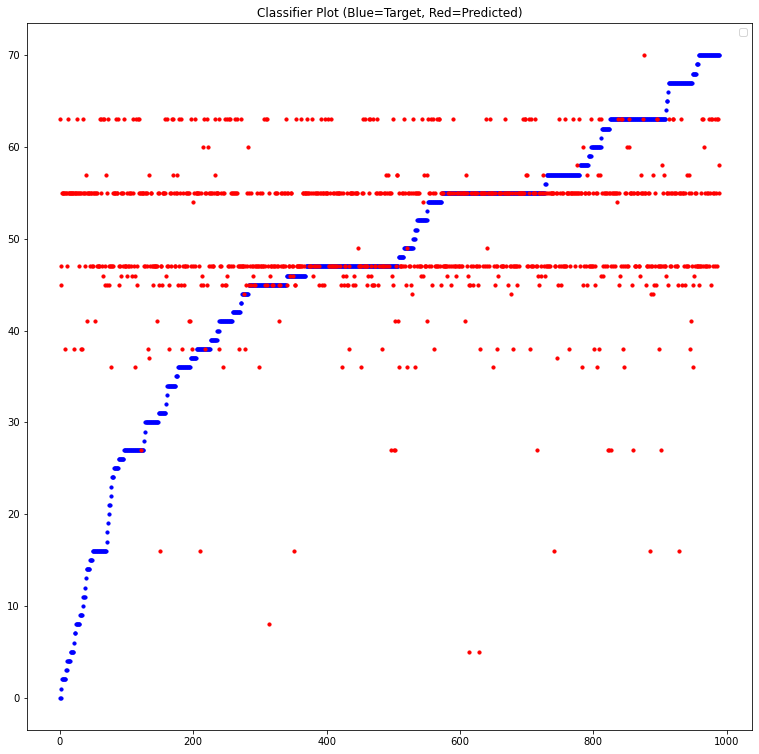

In [117]:
import matplotlib.colors as mcolors
namelist = list(birddict.keys())
colors = list(mcolors.CSS4_COLORS.keys())
colors = colors[:71]
y = target
target_names = namelist
targ_list = list(range(0, 71))

def plotGraph(y_test,y_pred,regressorName):
    fig = plt.figure(1, figsize=(13, 13))
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, s=10, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, s=10, color='red')
    plt.title(regressorName)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()
    return

plotGraph(y, predicted, "Classifier Plot (Blue=Target, Red=Predicted)")

In [63]:
uniqtargs = {x for x in target}
uniqtargslist = [x for x in uniqtargs]
uniqtargslist

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70]

In [49]:
len(overlap)

49

In [5]:
from sklearn.svm import SVC
import numpy as np
import json, librosa

with open('species.txt', 'r') as file:
    data = json.loads(file.readline().replace("'", "\""))

rev = {}

for key, lst in list(data.items()):
    for val in lst:
        rev[val] = key
        
with open('mfcc.json', 'r') as file:
    data = json.load(file)

X = []
y = []

for i in data['mfcc']:
    X_i = list(np.array(list(i.items())[0][1]).mean(axis=1))
    X.append(X_i)

    y_i = list(i.items())[0][0]
    y.append(rev[y_i])

X = np.array(X, dtype=list)
y = np.array(y, dtype=str)

clf = SVC(kernel="linear", C=0.025, probability=True)
clf.fit(X, y)

print("Model accuracy: %.1f%%" % (clf.score(X, y) * 100))

Model accuracy: 47.5%


Prediction: Hawk (22.9%)


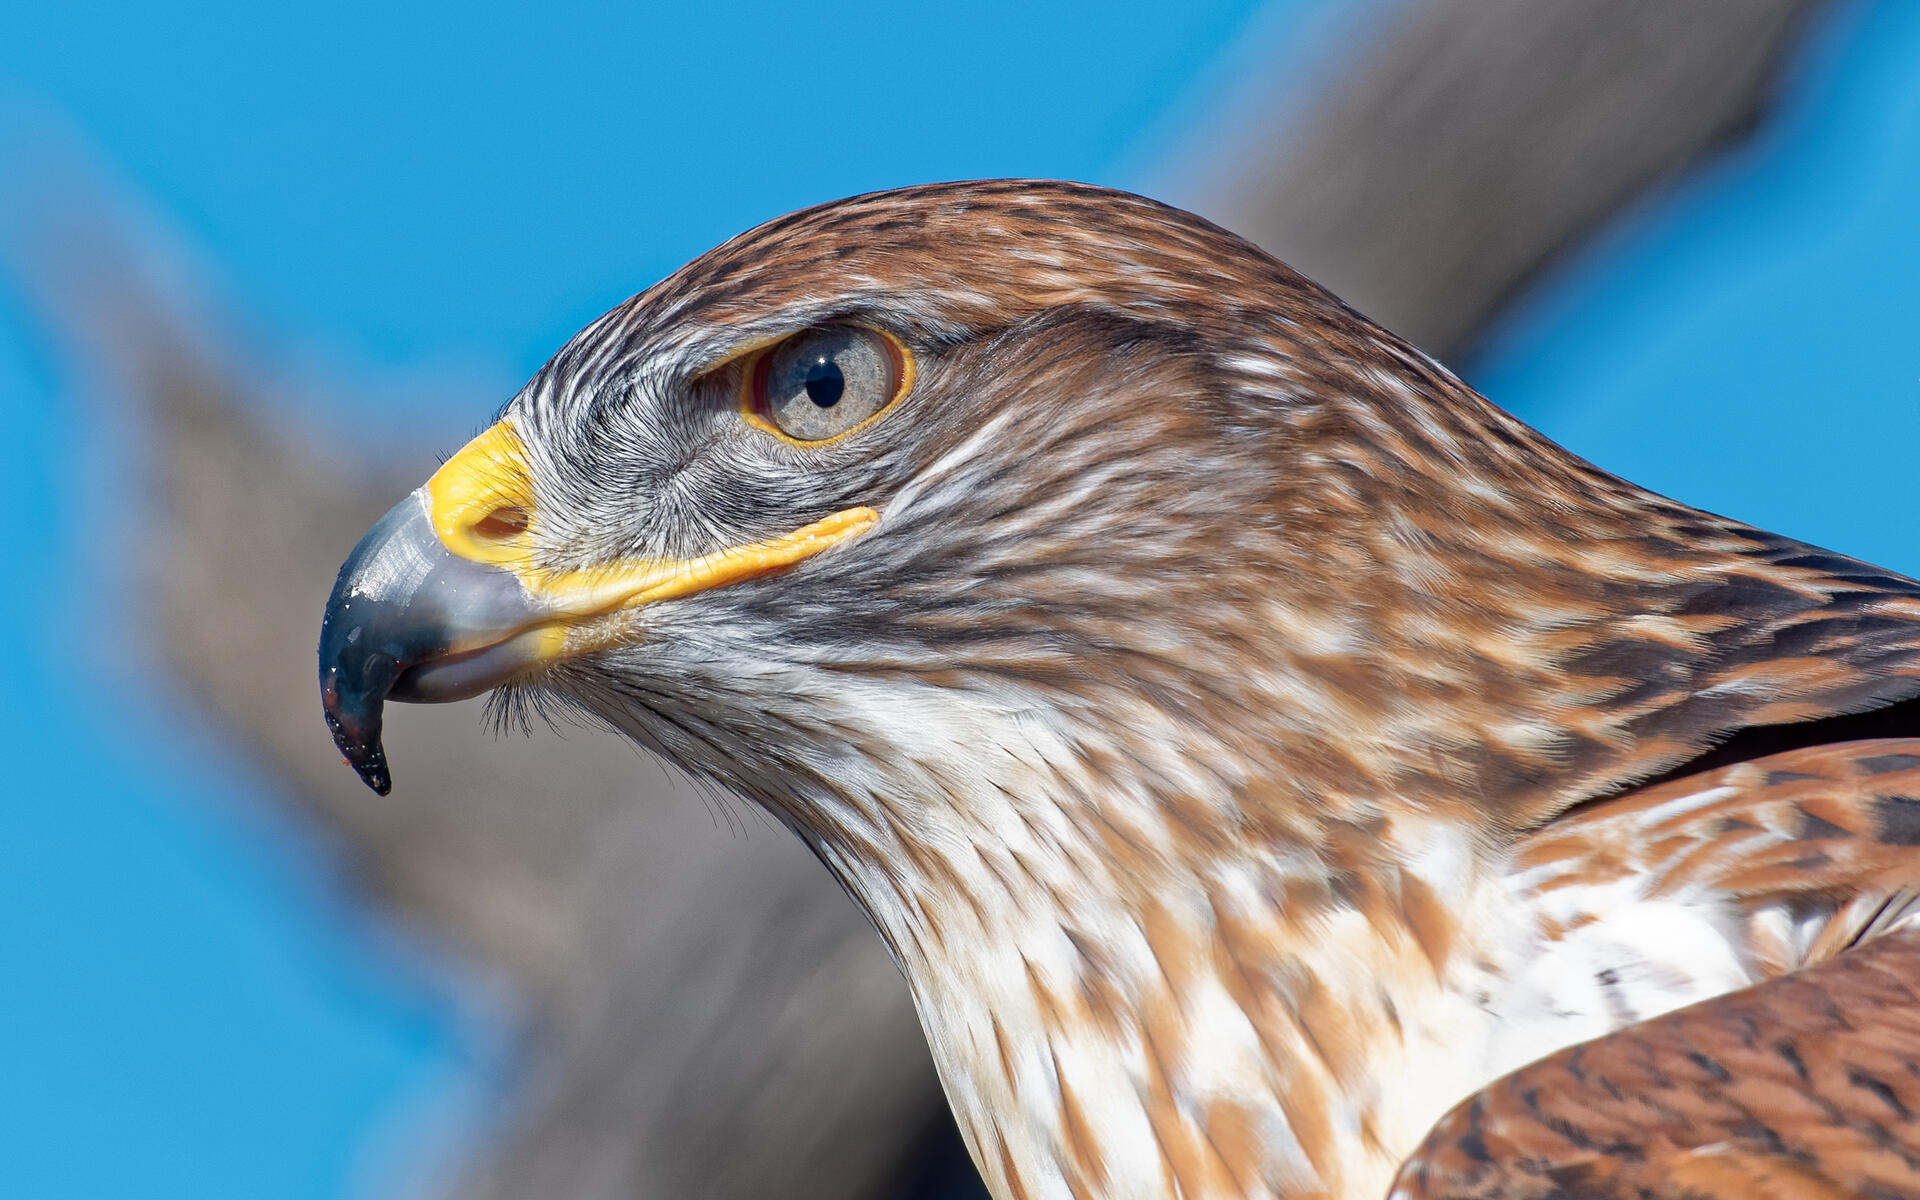

In [19]:
from IPython import display

# Specific test case
y_ref, sr = librosa.load('wav/114400.wav', duration=5)
y_mfcc = librosa.feature.mfcc(y=y_ref, sr=sr, hop_length=1024)
X_in = np.array(y_mfcc).mean(axis=1).reshape(1, -1)

y_pred = clf.predict(X_in)
y_prob = clf.predict_proba(X_in)

print("Prediction: %s (%.1f%%)" % (y_pred[0], max(y_prob[0]) * 100))

pred_bird_test = "birb_pics/" + y_pred[0] + ".jpeg"
display.Image(filename = pred_bird_test, width=400, height=400)

Prediction: Quail (7.2%)


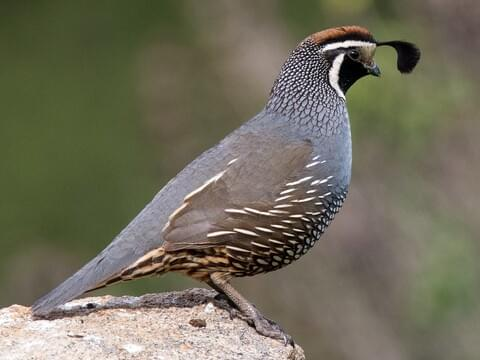

In [23]:
# More test cases
tst = 'test/'
demo = [tst+'longspur.wav', tst+'raven.wav', tst+'sparrow.wav', tst+'warbler.wav', '../a6/vocals.wav']
demoi = 4
y_ref, sr = librosa.load(demo[demoi], duration=5)
y_mfcc = librosa.feature.mfcc(y=y_ref, sr=sr, hop_length=1024)
X_in = np.array(y_mfcc).mean(axis=1).reshape(1, -1)

y_pred = clf.predict(X_in)
y_prob = clf.predict_proba(X_in)

print("Prediction: %s (%.1f%%)" % (y_pred[0], max(y_prob[0]) * 100))

pred_bird_test = "birb_pics/" + y_pred[0] + ".jpeg"
display.Image(filename = pred_bird_test, width=400, height=400)
